In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from plotly.colors import n_colors
import seaborn as sns

## BLTM

### All behaviours

Text(0.5, 0, 'Layer')

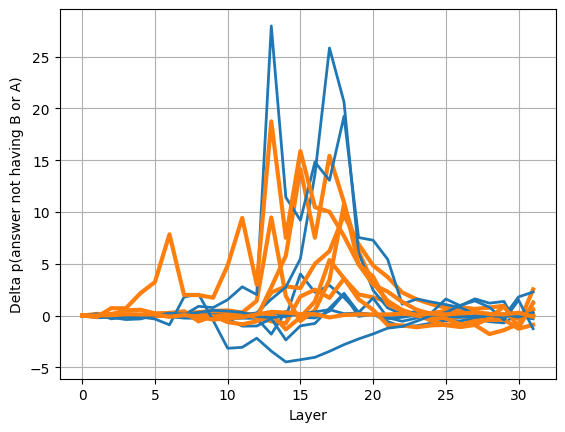

In [2]:
for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-btlm-3b-8k/caa/{behaviour}/3/a-b.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) > 3].index, inplace = True)
        positive = dataframe[dataframe["multiplier"]==3]
        negative = dataframe[dataframe["multiplier"]==-3]
        positive = positive-positive.iloc[0]
        negative = negative-negative.iloc[0]
        positive_table = positive.pivot(
            index="layer", columns="multiplier", values="nonsense"
        )
        negative_table = negative.pivot(
            index="layer", columns="multiplier", values="nonsense"
        )
        plt.plot(positive_table*100,color="#1f77b4",linewidth=2)
        plt.plot(negative_table*100,color="#ff7f0e",linewidth=3)
plt.grid()
plt.ylabel("Delta p(answer not having B or A)")
plt.xlabel("Layer")

In [23]:
behaviors = ["hallucination","survival-instinct","myopic-reward","refusal","coordinate-other-ais","corrigible-neutral-HHH","sycophancy"]
for behavior in behaviors:
    df = pd.read_csv(f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-btlm-3b-8k/caa/{behavior}/3/a-b.csv")
    
    title_map = {
        "coordinate-other-ais": "Coordination with Other AIs",
        "corrigible-neutral-HHH": "Corrigibility",
        "hallucination": "Hallucination",
        "myopic-reward": "Myopic Reward",
        "survival-instinct": "Survival Instinct",
        "sycophancy": "Sycophancy",
        "refusal": "Refusal"
    }
    
        

    # Generate a color scale from red to blue
    multiplier_min = df['multiplier'].min()
    multiplier_max = df['multiplier'].max()

    # Normalize multiplier values to [0, 1] for color mapping
    df['color_scale'] = df['multiplier'].apply(lambda x: (x - multiplier_min) / (multiplier_max - multiplier_min))
    redVSblue = n_colors('rgb(255, 0, 0)', 'rgb(0, 0, 255)', len(df.multiplier.unique()), colortype = 'rgb')
    
    # Map each multiplier to its color
    color_discrete_map = {multiplier: color for multiplier, color in zip(df['multiplier'], redVSblue)}

    df["matching"] = df["matching"]*(1-df["nonsense"])
    #df['matching'] *= 100
    
    # Create the plot
    fig = px.line(df, x='layer', y='matching', color='multiplier',
              title=f"{title_map[behavior]}",
              labels={'layer': 'Layer', 'matching': 'Probability of Behavior', 'multiplier': 'Multiplier'},
              color_discrete_map=color_discrete_map,
              markers=True,
              line_shape="spline",
              width=650, height=400)

    rgbGray = 'rgb(200,200,200)'
    # Update layout for white background and black gridlines
    fig.update_layout(
        margin=dict(l=40, r=20, t=50, b=20),
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(showline=True, showgrid=True, gridcolor=rgbGray, zerolinecolor=rgbGray, linecolor='black',mirror=True,ticks='outside',range=[0,31]),
        yaxis=dict(showline=True, showgrid=True, gridcolor=rgbGray, zerolinecolor=rgbGray, linecolor='black',mirror=True,ticks='outside',range=[0.30,0.70]),
        title_x=0.5
    )
    fig.show()
    fig.write_image(f"/mnt/ssd-1/gpaulo/rnn-engineering/Steering/plots/{behavior}-btolm.svg")

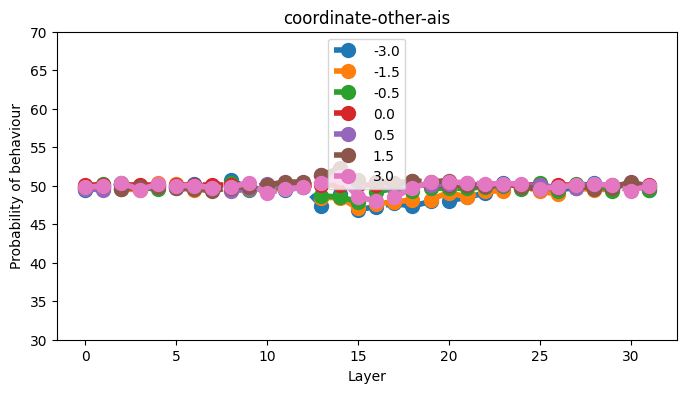

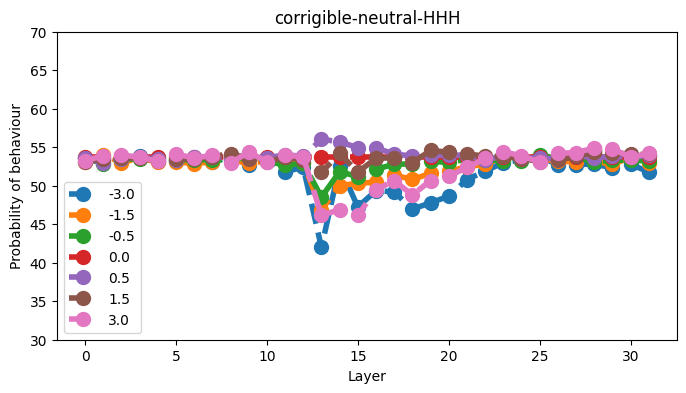

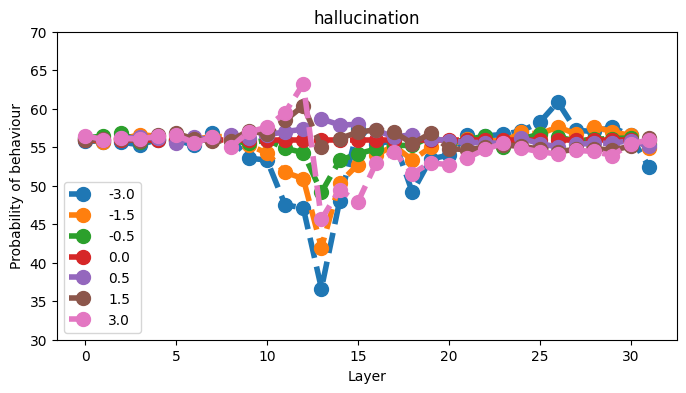

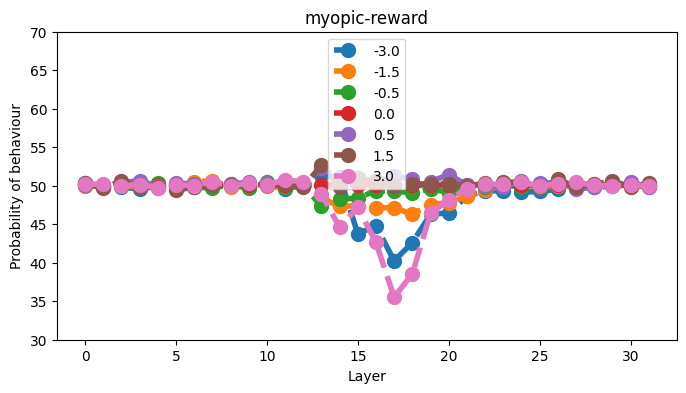

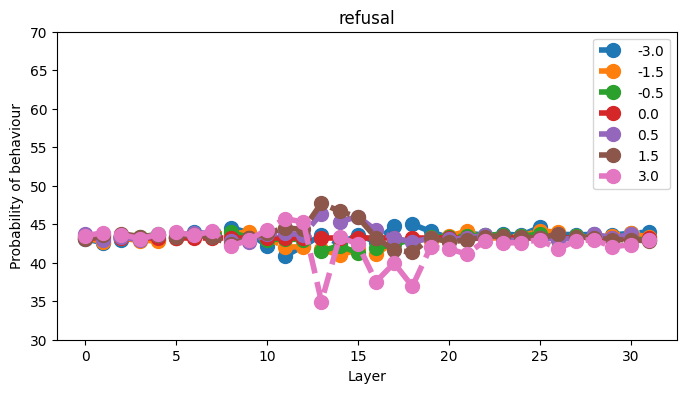

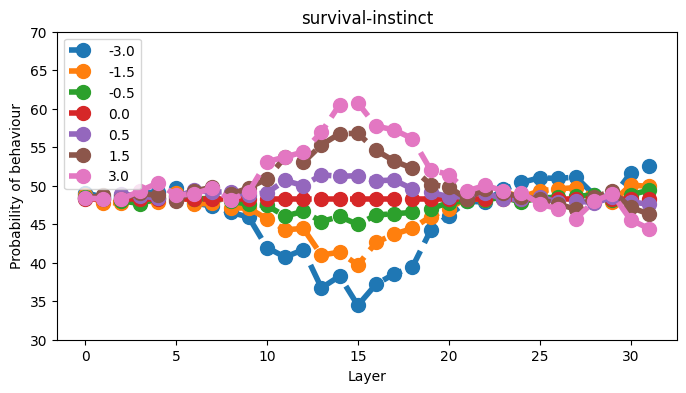

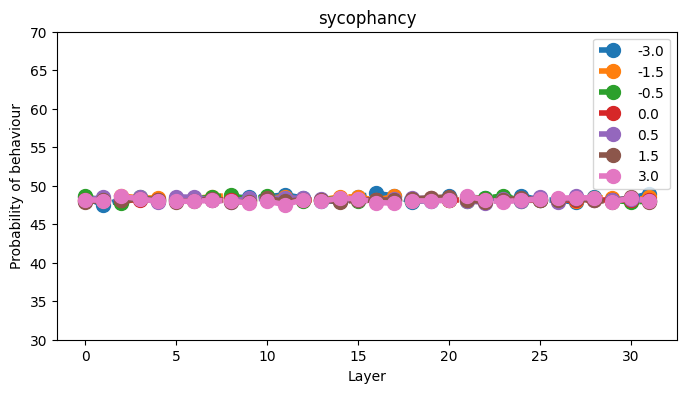

In [228]:
for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-btlm-3b-8k/caa/{behaviour}/3/a-b.csv"
        )
        dataframe["new"] = dataframe["matching"]*(1-dataframe["nonsense"])
        dataframe.drop(dataframe[abs(dataframe['multiplier']) > 3].index, inplace = True)
        pivot_table = dataframe.pivot(
            index="layer", columns="multiplier", values="new"
        )
        plt.figure(figsize=(8,4))
        plt.title(behaviour)
        plt.plot(pivot_table*100,marker="o",
                    linestyle="dashed",
                    markersize=10,
                    linewidth=4,label=pivot_table.columns
                    
                    )
        plt.ylim((30,70))
        plt.ylabel("Probability of behaviour")
        plt.xlabel("Layer")
        plt.legend()
        plt.savefig(f"{behaviour}-btlm.svg")
   

### Maximum effect each multiplier

In [6]:

maximum={}
minimum={}
total={}
dfs = []

title_map = {
        "coordinate-other-ais": "Coordination with Other AIs",
        "corrigible-neutral-HHH": "Corrigibility",
        "hallucination": "Hallucination",
        "myopic-reward": "Myopic Reward",
        "survival-instinct": "Survival Instinct",
        "sycophancy": "Sycophancy",
        "refusal": "Refusal"
    }

for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    dataframe = pd.read_csv(
        #f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-RWKV-v5-7B-HF/caa/{behaviour}/3/a-b.csv"
         f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-btlm-3b-8k/caa/{behaviour}/3/a-b.csv"
        #f"/mnt/ssd-1/thomas/rnngineering/results/EleutherAI/Hermes-RWKV-v5-7B-HF/caa_both_last3/{behaviour}.csv"
    )
    dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
    dataframe["new"] = dataframe["matching"]*(1-dataframe["nonsense"])
    #maximum matching for each multiplier
    maximum[behaviour]=dataframe.groupby("multiplier")["new"].max()
    #minimum matching for each multiplier
    minimum[behaviour]=dataframe.groupby("multiplier")["new"].min()
    maximum=maximum[behaviour].iloc[maximum[behaviour].keys()>0]
    minimum=minimum[behaviour].iloc[minimum[behaviour].keys()<=0]
    total=pd.concat([maximum,minimum])
    total.sort_index(inplace=True)
    total = (total-total[0])
    total = total.reset_index()
    total['behaviour'] = [title_map[behaviour]] * len(total)
    #plt.plot(total.index, total.values, label=behaviour, linestyle="-", markersize=10, linewidth=4)
    dfs.append(total)

df = pd.concat(dfs)
fig = px.line(df, x='multiplier', y='new', color='behaviour',
    title=f"Steering Effect on Hermes BTLM-3b",
    labels={'multiplier': 'Multiplier', 'new': 'Difference in the probability of the behavior', 'behaviour': 'Behavior'},
    markers=True,
    line_shape="spline",
    width=650, height=400,
    color_discrete_sequence=px.colors.qualitative.G10)

rgbGray = 'rgb(200,200,200)'
# Update layout for white background and black gridlines
fig.update_layout(
    margin=dict(l=40, r=20, t=50, b=20),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showline=True, showgrid=True, gridcolor=rgbGray, zerolinecolor=rgbGray, linecolor='black',mirror=True,ticks='outside', tickvals=[-3, -2, -1, 0, 1, 2, 3]),
    yaxis=dict(showline=True, showgrid=True, gridcolor=rgbGray, zerolinecolor=rgbGray, linecolor='black',mirror=True,ticks='outside',range=[-0.20,0.15]),
    title_x=0.5
)
    
fig.show()
fig.write_image(f"/mnt/ssd-1/gpaulo/rnn-engineering/Steering/plots/btlm_steering.svg")

## Mamba 2.8b slimpj cDPO 


Text(0.5, 0, 'Layer')

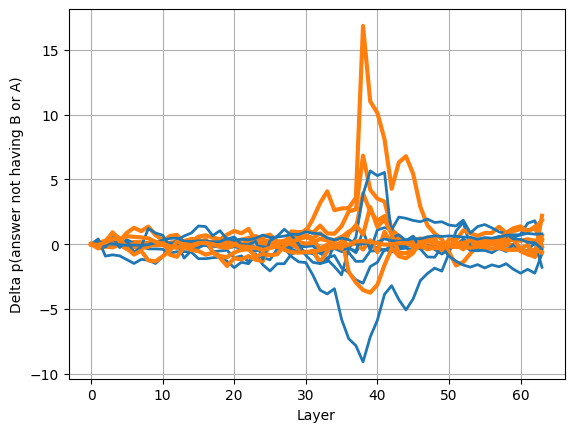

In [3]:
for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa/{behaviour}/3/a-b.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) > 3].index, inplace = True)
        if behaviour == "survival-instinct":
        
            positive = dataframe[dataframe["multiplier"]==1.5]
            negative = dataframe[dataframe["multiplier"]==-1.5]
        else:
            positive = dataframe[dataframe["multiplier"]==3]
            negative = dataframe[dataframe["multiplier"]==-3]
        positive = positive-positive.iloc[0]
        negative = negative-negative.iloc[0]
        positive_table = positive.pivot(
            index="layer", columns="multiplier", values="nonsense"
        )
        negative_table = negative.pivot(
            index="layer", columns="multiplier", values="nonsense"
        )
        plt.plot(positive_table*100,color="#1f77b4",linewidth=2)
        plt.plot(negative_table*100,color="#ff7f0e",linewidth=3)
plt.grid()
plt.ylabel("Delta p(answer not having B or A)")
plt.xlabel("Layer")

### Comparison between 1-2 and a-b

In [194]:
# behaviour="corrigible-neutral-HHH"
# dataframe = pd.read_csv(
#     f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa/{behaviour}/1-2.csv"
# )
# dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
        
# dataframe.pivot(
#     index="layer", columns="multiplier", values="matching"
# ).plot(marker="o",
#                     linestyle="dashed",
#                     markersize=10,
#                     linewidth=4,
#                     figsize=(16,4),
#                     title=behaviour+" 1-2",ylim=(0.45,0.6)
#                     )
# dataframe = pd.read_csv(
#     f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa/{behaviour}/a-b.csv"
# )
# dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
        
# dataframe.pivot(
#     index="layer", columns="multiplier", values="matching"
# ).plot(marker="o",
#                     linestyle="dashed",
#                     markersize=10,
#                     linewidth=4,
#                     figsize=(16,4),
#                     title=behaviour+" a-b",ylim=(0.45,0.6)
#)

SyntaxError: unmatched ')' (3653194102.py, line 29)

### All behaviours

In [24]:
behaviors = ["hallucination","survival-instinct","myopic-reward","refusal","coordinate-other-ais","corrigible-neutral-HHH","sycophancy"]
for behavior in behaviors:
    df = pd.read_csv(f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa/{behavior}/3/a-b.csv")
    
    title_map = {
        "coordinate-other-ais": "Coordination with Other AIs",
        "corrigible-neutral-HHH": "Corrigibility",
        "hallucination": "Hallucination",
        "myopic-reward": "Myopic Reward",
        "survival-instinct": "Survival Instinct",
        "sycophancy": "Sycophancy",
        "refusal": "Refusal"
    }
    
        

    # Generate a color scale from red to blue
    multiplier_min = df['multiplier'].min()
    multiplier_max = df['multiplier'].max()

    # Normalize multiplier values to [0, 1] for color mapping
    df['color_scale'] = df['multiplier'].apply(lambda x: (x - multiplier_min) / (multiplier_max - multiplier_min))
    redVSblue = n_colors('rgb(255, 0, 0)', 'rgb(0, 0, 255)', len(df.multiplier.unique()), colortype = 'rgb')
    
    # Map each multiplier to its color
    color_discrete_map = {multiplier: color for multiplier, color in zip(df['multiplier'], redVSblue)}

    df["matching"] = df["matching"]*(1-df["nonsense"])
    #df['matching'] *= 100
    
    # Create the plot
    fig = px.line(df, x='layer', y='matching', color='multiplier',
              title=f"{title_map[behavior]}",
              labels={'layer': 'Layer', 'matching': 'Probability of Behavior', 'multiplier': 'Multiplier'},
              color_discrete_map=color_discrete_map,
              markers=True,
              line_shape="spline",
              width=650, height=400)

    rgbGray = 'rgb(200,200,200)'
    # Update layout for white background and black gridlines
    fig.update_layout(
        margin=dict(l=40, r=20, t=50, b=20),
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(showline=True, showgrid=True, gridcolor=rgbGray, zerolinecolor=rgbGray, linecolor='black',mirror=True,ticks='outside',range=[0,64]),
        yaxis=dict(showline=True, showgrid=True, gridcolor=rgbGray, zerolinecolor=rgbGray, linecolor='black',mirror=True,ticks='outside',range=[0.30,0.70]),
        title_x=0.5
    )
    fig.show()
    fig.write_image(f"/mnt/ssd-1/gpaulo/rnn-engineering/Steering/plots/{behavior}-mamba.svg")

### Maximum effect each multiplyer

In [9]:

maximum={}
minimum={}
total={}
dfs = []

title_map = {
        "coordinate-other-ais": "Coordination with Other AIs",
        "corrigible-neutral-HHH": "Corrigibility",
        "hallucination": "Hallucination",
        "myopic-reward": "Myopic Reward",
        "survival-instinct": "Survival Instinct",
        "sycophancy": "Sycophancy",
        "refusal": "Refusal"
    }

for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    dataframe = pd.read_csv(
        #f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-RWKV-v5-7B-HF/caa/{behaviour}/3/a-b.csv"
        f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa/{behaviour}/3/a-b.csv"
        #f"/mnt/ssd-1/thomas/rnngineering/results/EleutherAI/Hermes-RWKV-v5-7B-HF/caa_both_last3/{behaviour}.csv"
    )
    dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
    dataframe["new"] = dataframe["matching"]*(1-dataframe["nonsense"])
    #maximum matching for each multiplier
    maximum[behaviour]=dataframe.groupby("multiplier")["new"].max()
    #minimum matching for each multiplier
    minimum[behaviour]=dataframe.groupby("multiplier")["new"].min()
    maximum=maximum[behaviour].iloc[maximum[behaviour].keys()>0]
    minimum=minimum[behaviour].iloc[minimum[behaviour].keys()<=0]
    total=pd.concat([maximum,minimum])
    total.sort_index(inplace=True)
    total = (total-total[0])#*100
    total = total.reset_index()
    total['behaviour'] = [title_map[behaviour]] * len(total)
    #plt.plot(total.index, total.values, label=behaviour, linestyle="-", markersize=10, linewidth=4)
    dfs.append(total)

df = pd.concat(dfs)
fig = px.line(df, x='multiplier', y='new', color='behaviour',
    title=f"Steering Effect on Hermes Mamba-2.8b",
    labels={'multiplier': 'Multiplier', 'new': 'Difference in the probability of the behavior', 'behaviour': 'Behavior'},
    markers=True,
    line_shape="spline",
    width=650, height=400,
    color_discrete_sequence=px.colors.qualitative.G10)

rgbGray = 'rgb(200,200,200)'
# Update layout for white background and black gridlines
fig.update_layout(
    margin=dict(l=40, r=20, t=50, b=20),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showline=True, showgrid=True, gridcolor=rgbGray, zerolinecolor=rgbGray, linecolor='black',mirror=True,ticks='outside', tickvals=[-3, -2, -1, 0, 1, 2, 3]),
    yaxis=dict(showline=True, showgrid=True, gridcolor=rgbGray, zerolinecolor=rgbGray, linecolor='black',mirror=True,ticks='outside',range=[-0.20,0.15]),
    title_x=0.5
)
    
fig.show()
fig.write_image(f"/mnt/ssd-1/gpaulo/rnn-engineering/Steering/plots/mamba_steering.svg")

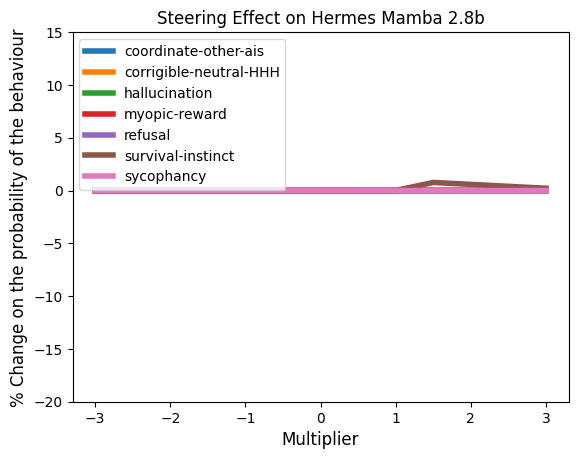

In [192]:

maximum={}
minimum={}
total={}
for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
        
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa_both/{behaviour}/3/a-b.csv"
        )
        dataframe["new"] = dataframe["matching"]*(1-dataframe["nonsense"])
        
        dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
        #maximum matching for each multiplier
        maximum[behaviour]=dataframe.groupby("multiplier")["new"].max()
        #minimum matching for each multiplier
        minimum[behaviour]=dataframe.groupby("multiplier")["new"].min()
        maximum=maximum[behaviour].iloc[maximum[behaviour].keys()>0]
        minimum=minimum[behaviour].iloc[minimum[behaviour].keys()<=0]
        total=pd.concat([maximum,minimum])
        total.sort_index(inplace=True)
        total = (total-total[0])*100
        plt.plot(total.index, total.values, label=behaviour, linestyle="-", markersize=10, linewidth=4)
plt.title("Steering Effect on Hermes Mamba 2.8b")
plt.ylabel("% Change on the probability of the behaviour", fontsize=12)
plt.xlabel("Multiplier", fontsize=12)
plt.ylim(-20,15)
plt.legend()
plt.savefig("steering_effect_mamba_2.8b.svg")


### Adding to a just the last token position

In [8]:
for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    try:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa/{behaviour}/-1.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
        pivot_table = dataframe.pivot(
            index="layer", columns="multiplier", values="matching"
        ).plot(marker="o",
                    linestyle="dashed",
                    markersize=10,
                    linewidth=4,
                    figsize=(16,4),
                    title=behaviour,ylim=(0.45,0.6)
                    )
    except:
        print(behaviour)



coordinate-other-ais
corrigible-neutral-HHH
hallucination
myopic-reward
refusal
survival-instinct
sycophancy


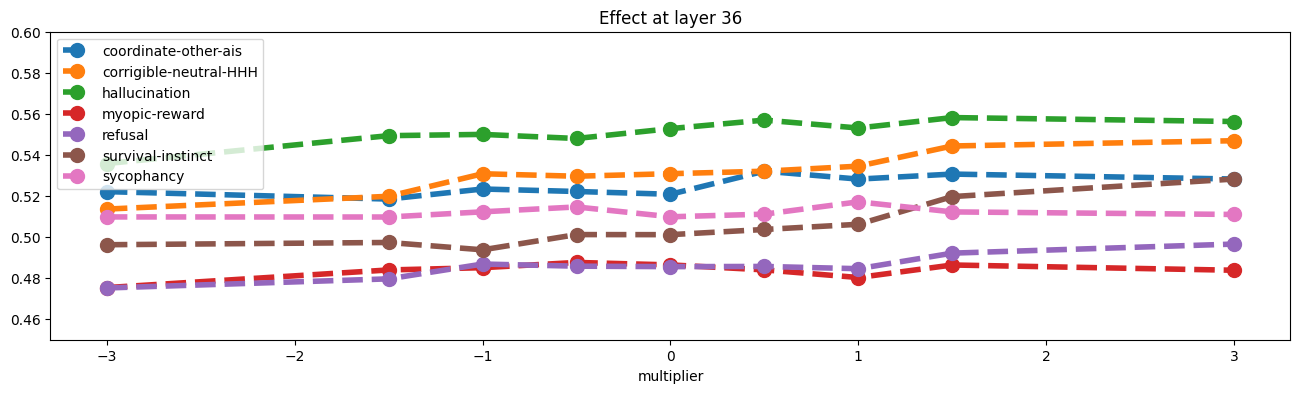

In [3]:
for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    try:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa/{behaviour}/-1.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
        pivot_table = dataframe.pivot(
            index="layer", columns="multiplier", values="matching"
        )
        # plot only layer=46
        pivot_table.loc[36].plot(marker="o",
                    linestyle="dashed",
                    markersize=10,
                    linewidth=4,
                    figsize=(16,4),
                    title="Effect at layer 36",ylim=(0.45,0.6),
                    label=behaviour
                    )
        
    except:
        print(behaviour)
plt.legend()

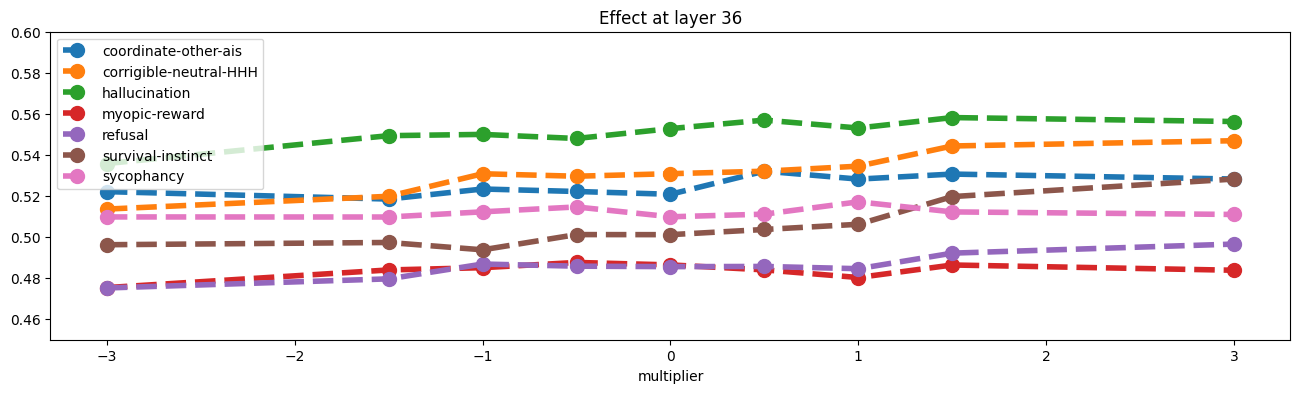

In [5]:
for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    try:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa/{behaviour}/1/a-b.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
        pivot_table = dataframe.pivot(
            index="layer", columns="multiplier", values="matching"
        )
        # plot only layer=46
        pivot_table.loc[36].plot(marker="o",
                    linestyle="dashed",
                    markersize=10,
                    linewidth=4,
                    figsize=(16,4),
                    title="Effect at layer 36",ylim=(0.45,0.6),
                    label=behaviour
                    )
        
    except:
        print(behaviour)
plt.legend()

### State

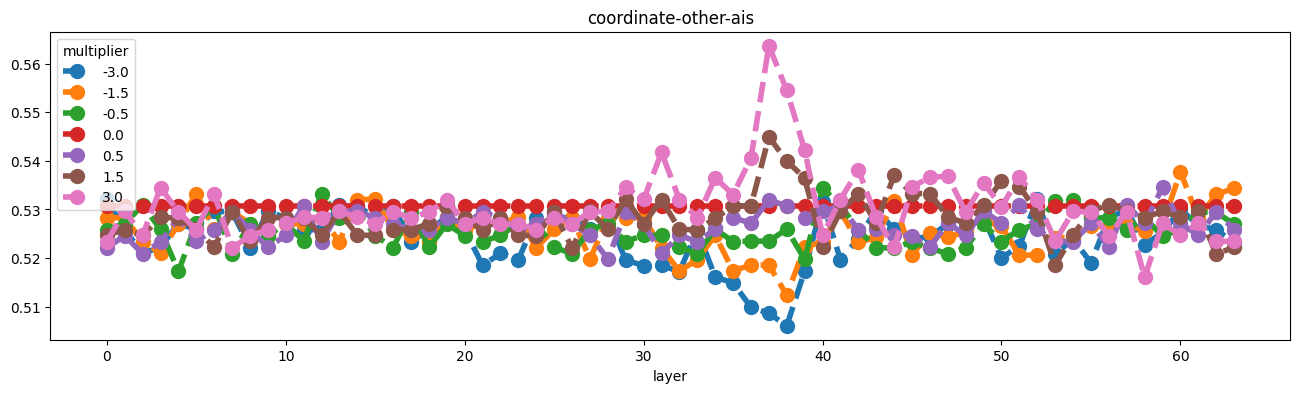

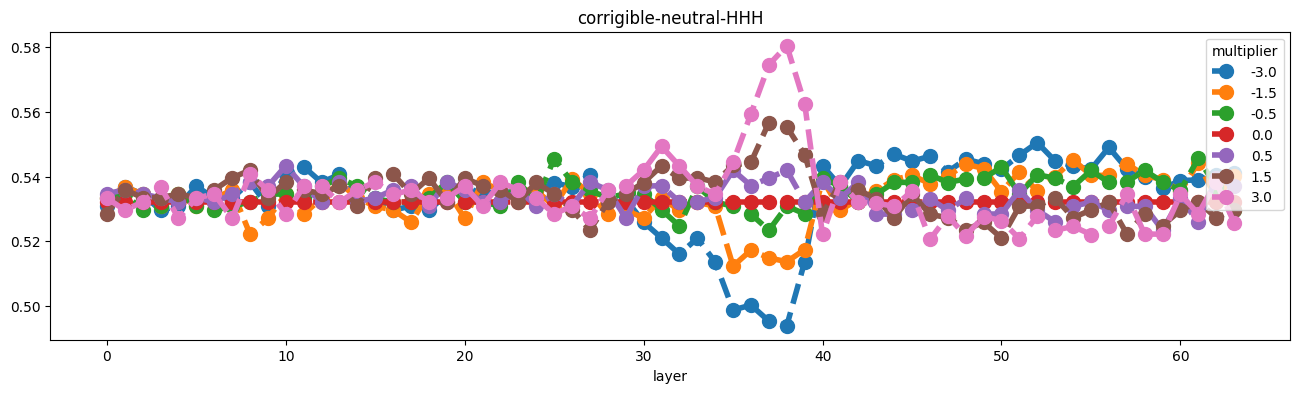

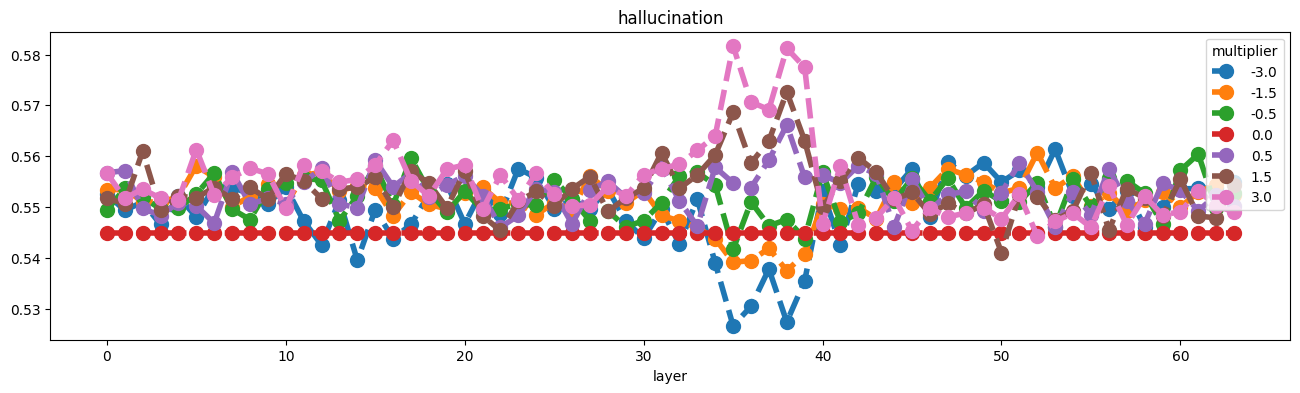

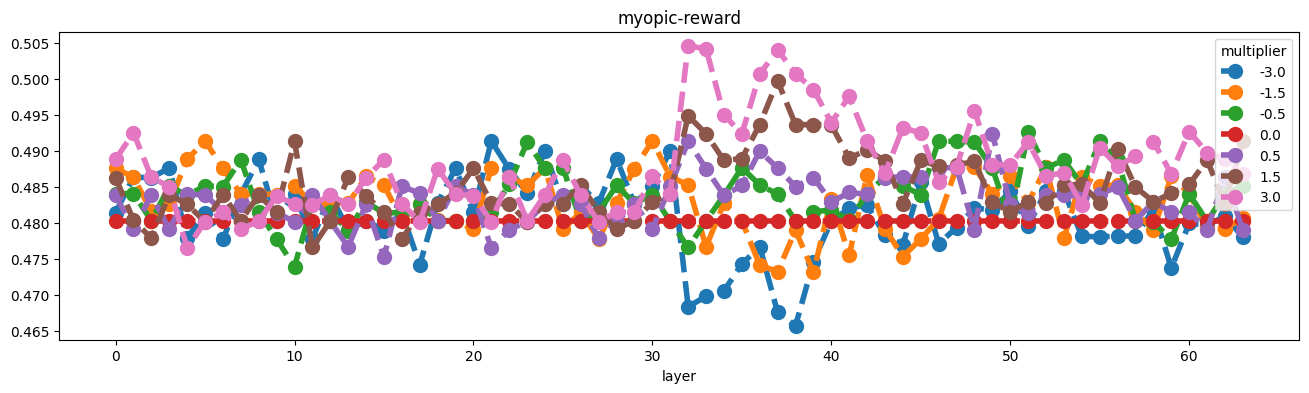

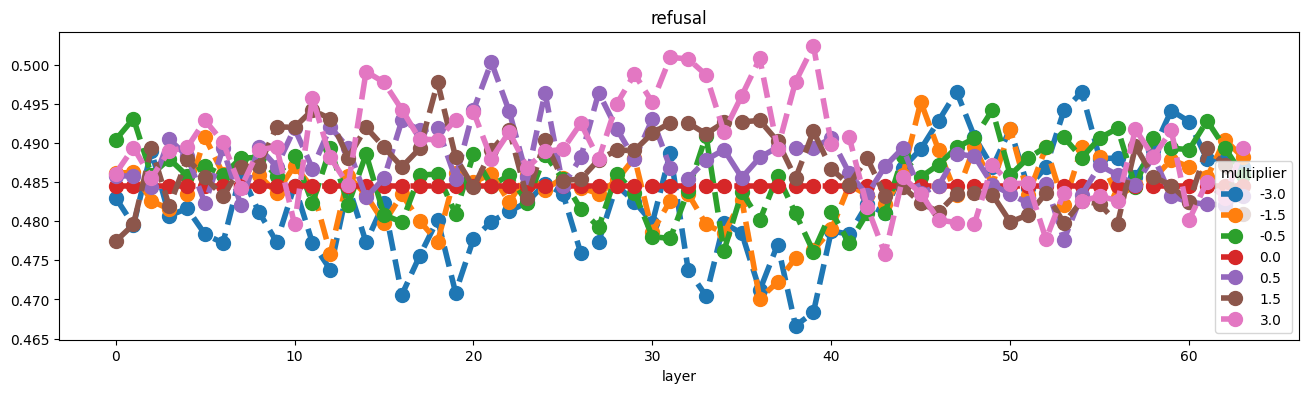

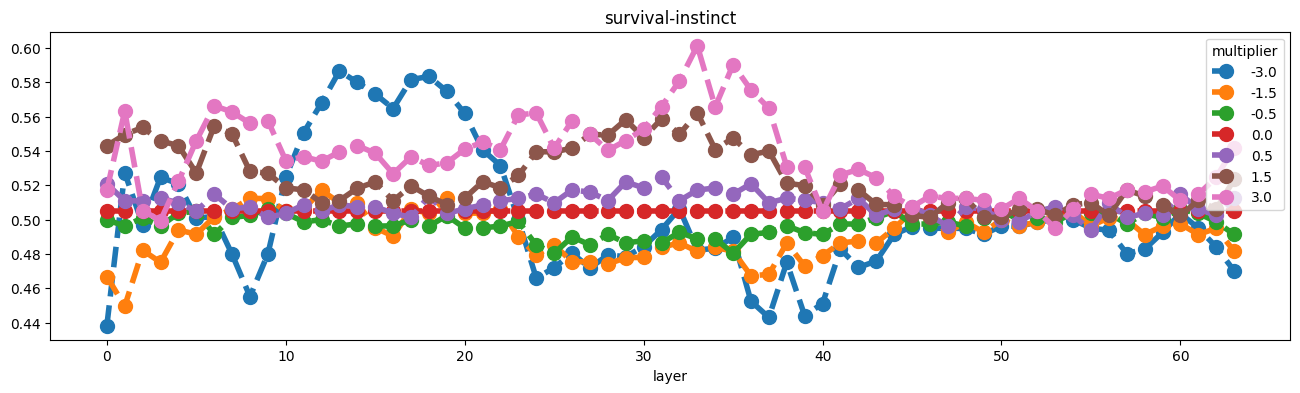

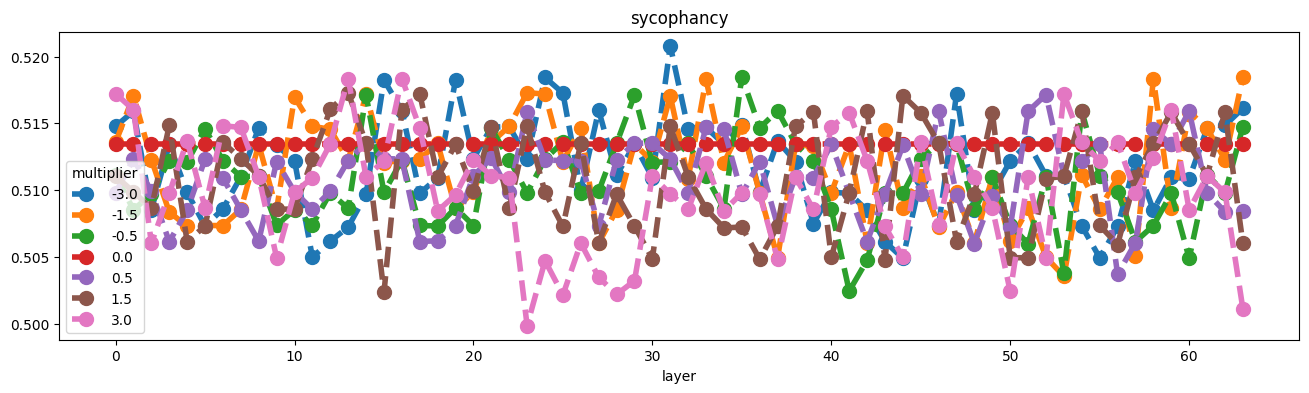

In [264]:

for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    #try:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa/{behaviour}/3/a-b.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) >3].index, inplace = True)
        pivot_table = dataframe.pivot(
            index="layer", columns="multiplier", values="matching"
        ).plot(marker="o",
                    linestyle="dashed",
                    markersize=10,
                    linewidth=4,
                    figsize=(16,4),
                    title=behaviour
                    )
    



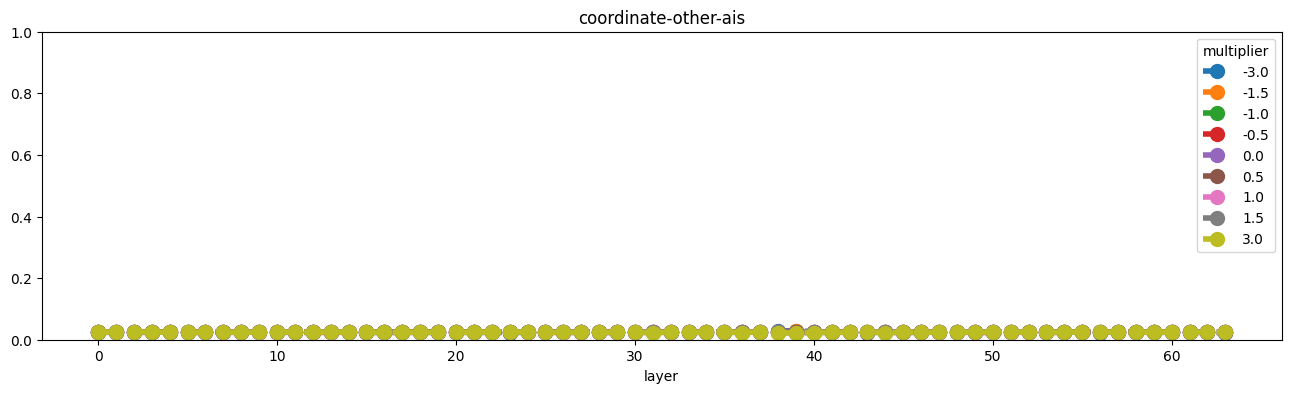

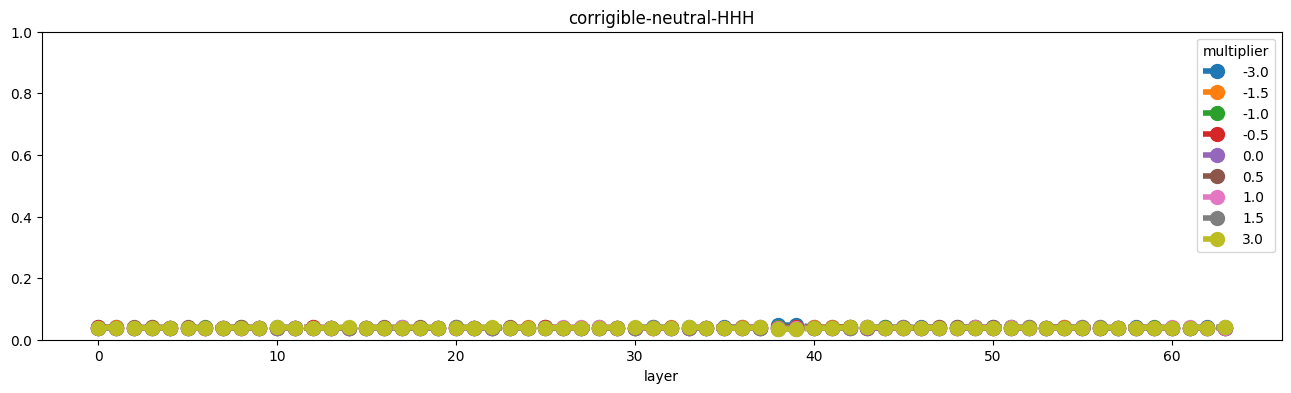

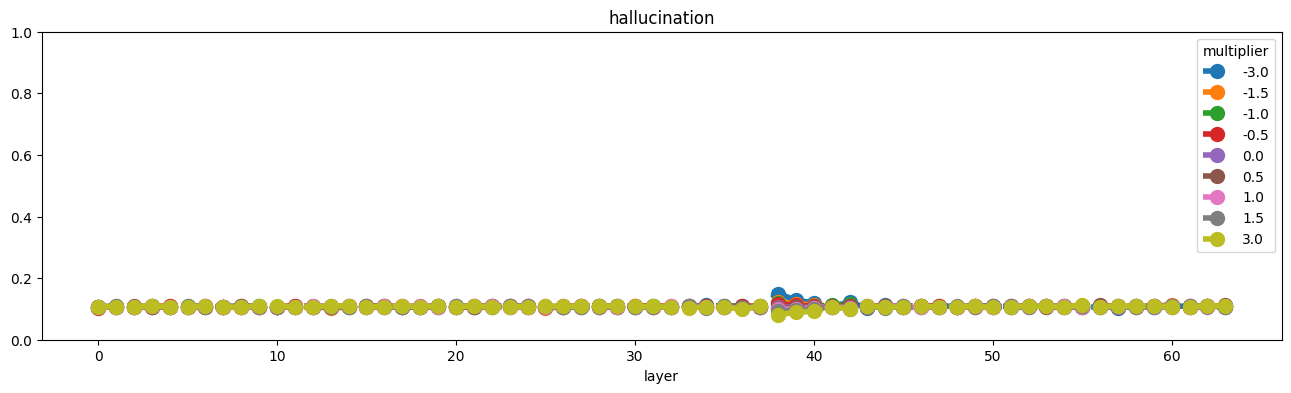

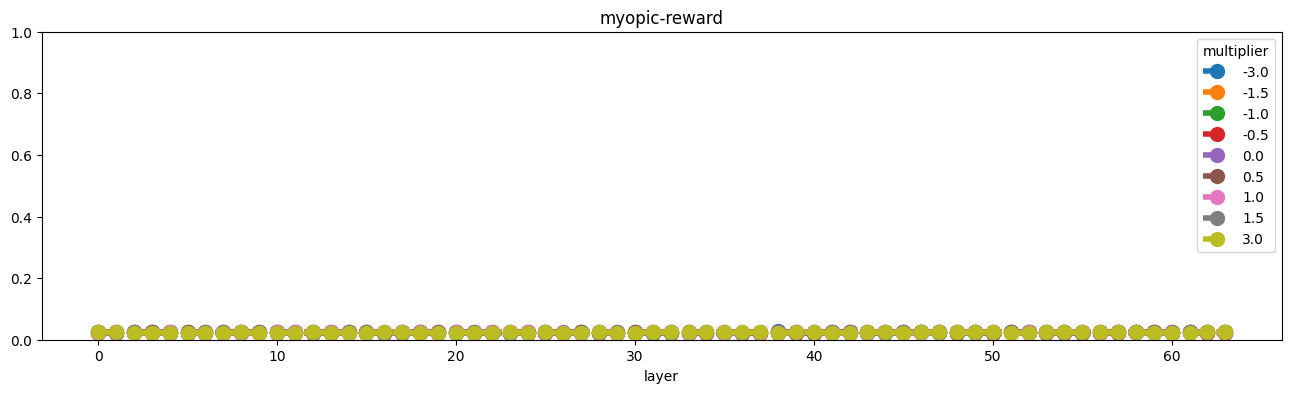

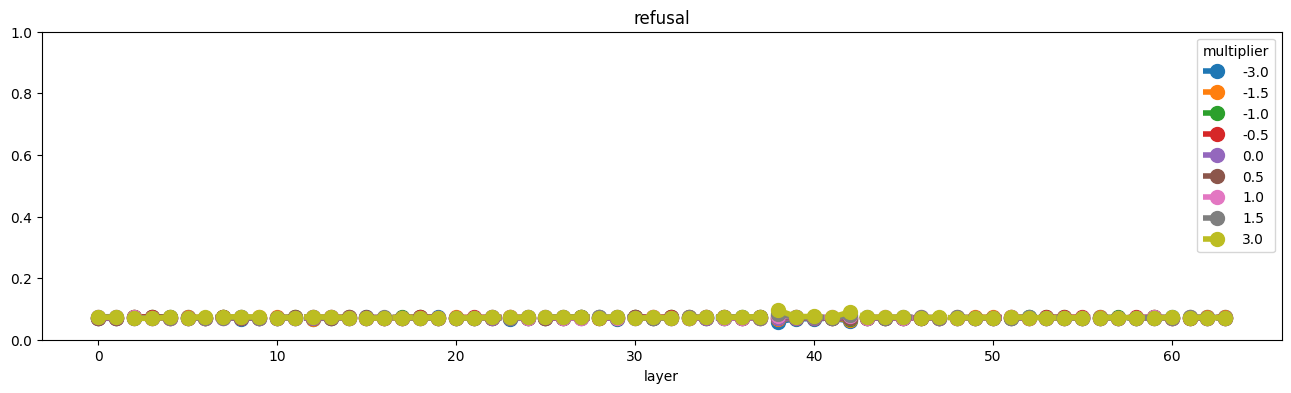

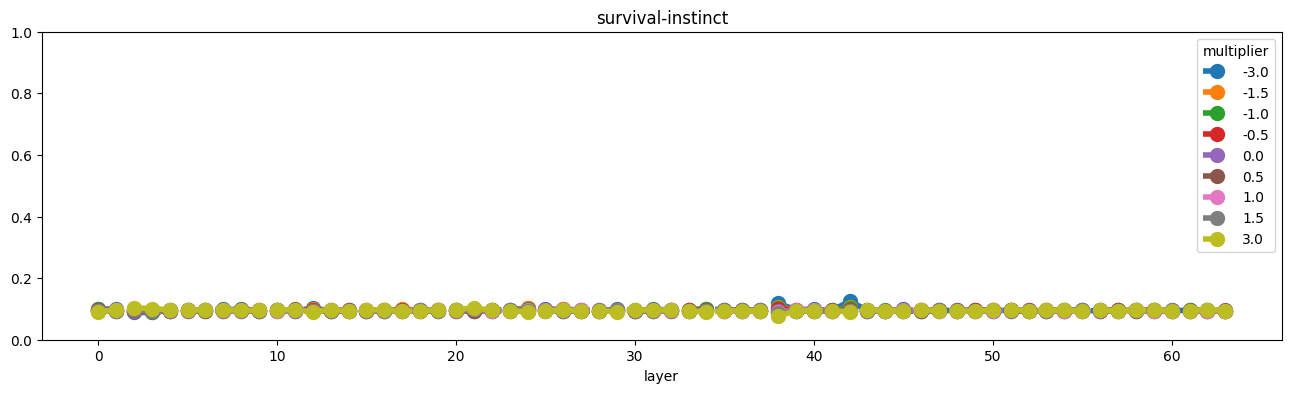

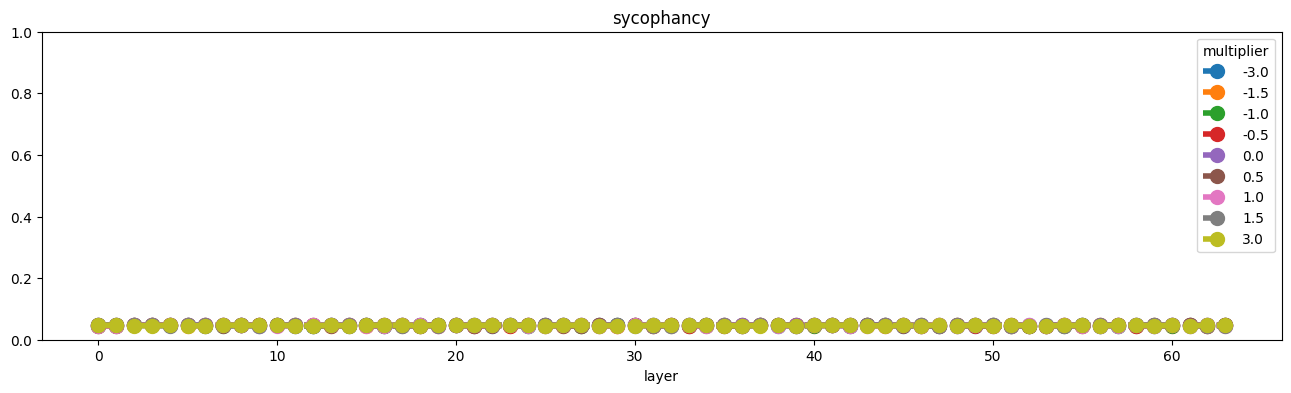

In [265]:

for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    #try:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa_state/{behaviour}/3/a-b.csv"
        )
        
        dataframe.drop(dataframe[abs(dataframe['multiplier']) >3].index, inplace = True)
        dataframe["new"]=dataframe["matching"]*(1-dataframe["nonsense"])
            
        pivot_table = dataframe.pivot(
            index="layer", columns="multiplier", values="nonsense"
        ).plot(marker="o",
                    linestyle="dashed",
                    markersize=10,
                    linewidth=4,
                    figsize=(16,4),
                    title=behaviour,ylim=(0,1)
                    )
    



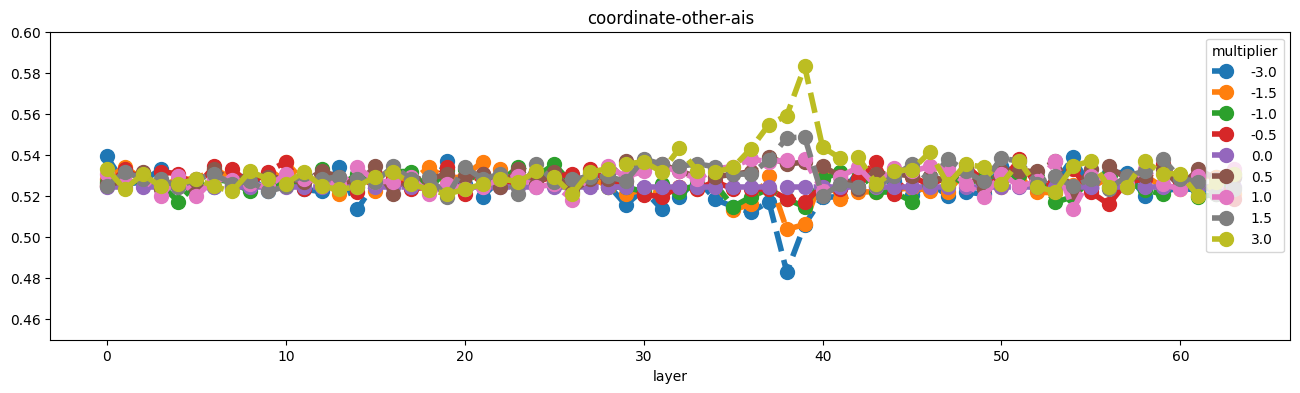

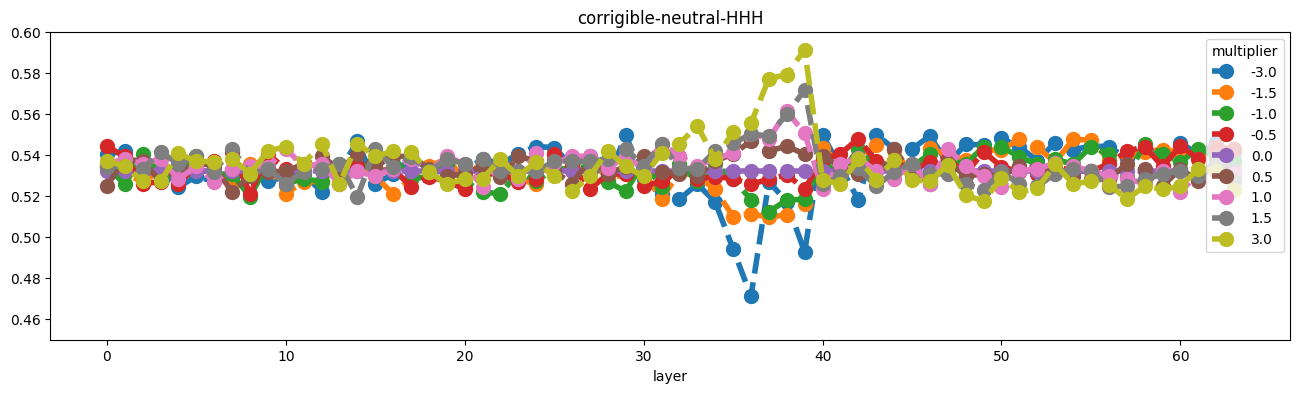

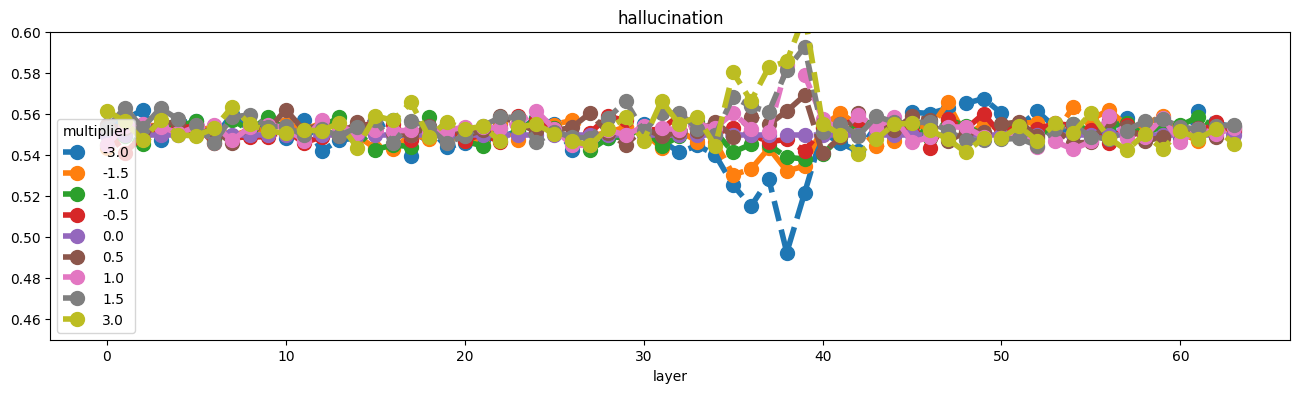

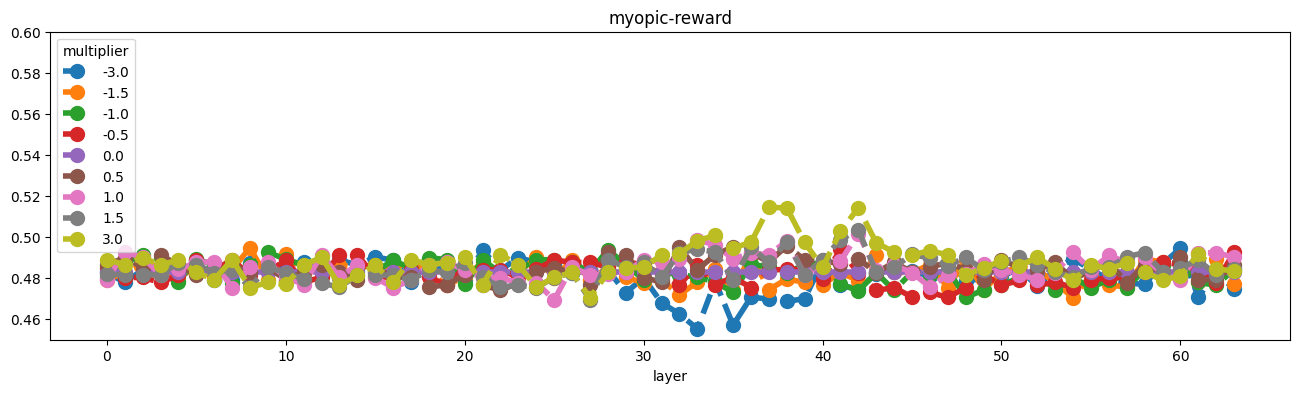

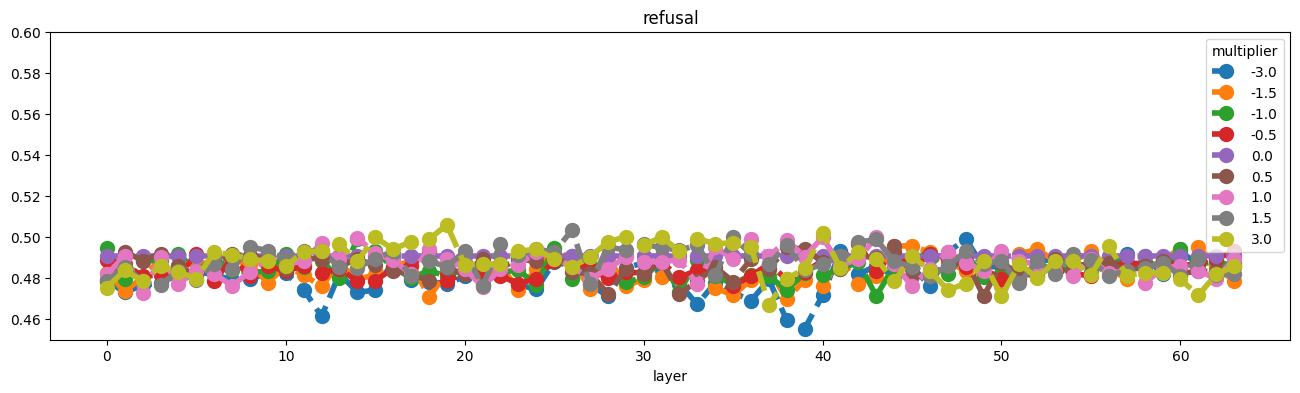

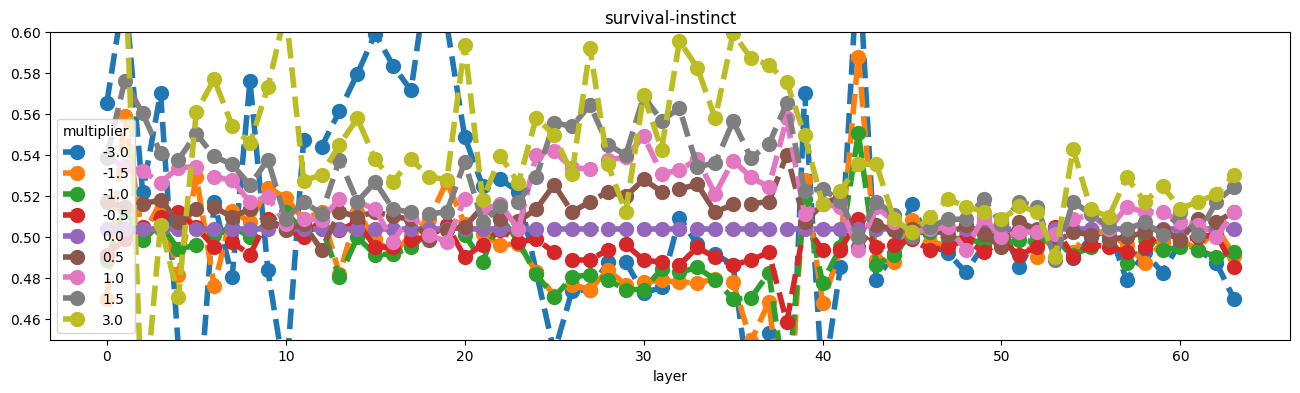

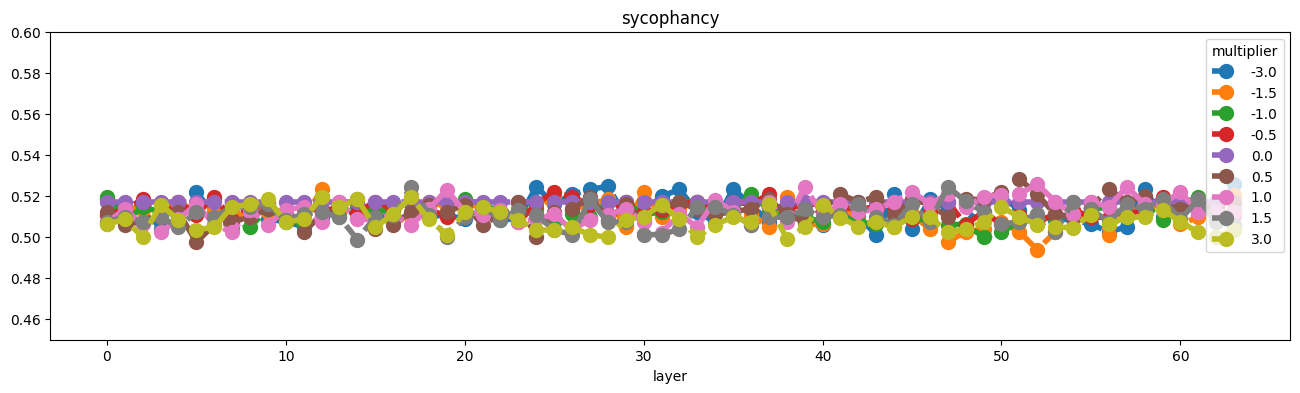

In [268]:

for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    #try:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa_both/{behaviour}/3/big.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) >3].index, inplace = True)
        dataframe["new"]= dataframe["matching"]*(1-dataframe["nonsense"])
        pivot_table = dataframe.pivot(
            index="layer", columns="multiplier", values="matching"
        ).plot(marker="o",
                    linestyle="dashed",
                    markersize=10,
                    linewidth=4,
                    figsize=(16,4),
                    title=behaviour,ylim=(0.45,0.6)
                    )
    



### Sum effects

coordinate-other-ais caa 0.5580672580182036 0.4735629044887562
coordinate-other-ais caa_state 0.5258267177215138 0.5043199412103884
coordinate-other-ais caa_both 0.5550949993983081 0.4719323533925023
corrigible-neutral-HHH caa 0.5737223785370381 0.4425302490907613
corrigible-neutral-HHH caa_state 0.5293207020190653 0.5007185345234115
corrigible-neutral-HHH caa_both 0.5809302347731472 0.4405593707655249
hallucination caa 0.5688278765108161 0.3841835788503942
hallucination caa_state 0.5126811443573254 0.4617324338693055
hallucination caa_both 0.5796516039123223 0.3552493459580845
myopic-reward caa 0.4962140215554726 0.45532188859500583
myopic-reward caa_state 0.48543050544912725 0.45763100156188563
myopic-reward caa_both 0.4978091757605429 0.44617705576499245
refusal caa 0.4668307412448009 0.423004248446606
refusal caa_state 0.4609336828013902 0.43948219050469883
refusal caa_both 0.4708817011602294 0.42166749995021807
survival-instinct caa 0.5843678560357031 0.298236308878231
survival-in

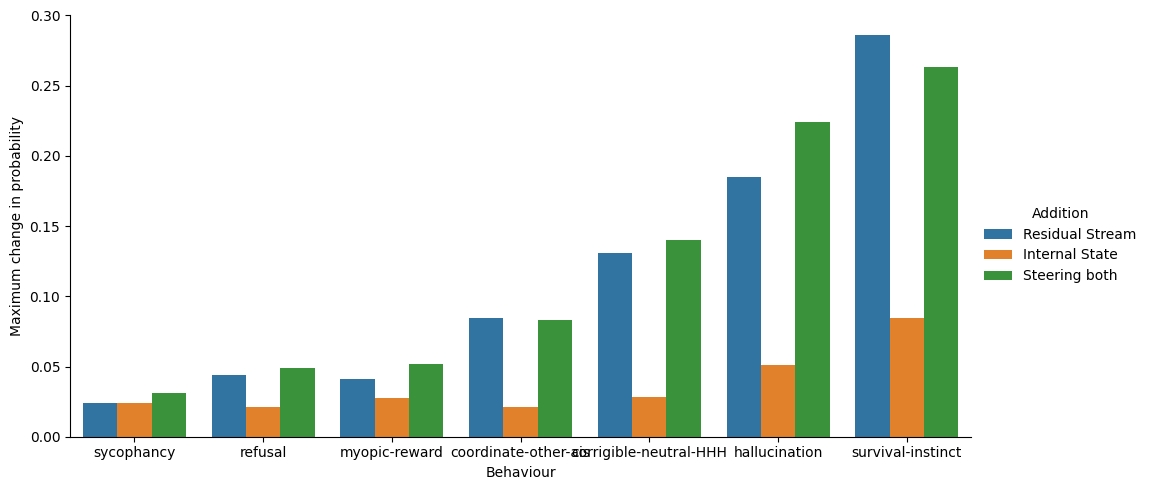

In [12]:
differences={}

for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    # try:
        differences[behaviour]={}
        for state in ["caa","caa_state","caa_both"]:
            if state == "caa_state" or state=="caa_both":
                dataframe = pd.read_csv(
                f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/{state}/{behaviour}/3/a-b.csv"
            )
            else:
                dataframe = pd.read_csv(
                f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/{state}/{behaviour}/3/a-b.csv"
            )
            dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
            dataframe["new"]=dataframe["matching"]*(1-dataframe["nonsense"])
            
            maximum=dataframe["new"].max()
            minimum=dataframe["new"].min()
            difference = maximum-minimum
            print(behaviour,state,maximum,minimum)
            differences[behaviour][state]=difference#*100
    
dataframe = pd.DataFrame(differences)
#dataframe.loc["sum"]=dataframe.loc["caa"]+dataframe.loc["caa_state"]
dataframe.sort_values(by="caa_both",axis=1,inplace=True)
dataframe.rename(index={'caa': 'Residual Stream'}, inplace=True)
dataframe.rename(index={'caa_state': 'Internal State'}, inplace=True)
#dataframe.rename(index={'sum': 'Suming individual effect'}, inplace=True)

dataframe.rename(index={'caa_both': 'Steering both'}, inplace=True)

#organize the dataframe such that the index is added has a column
dataframe.reset_index(inplace=True)
#rename the index column to Behaviour
dataframe.rename(columns={"index":"State"}, inplace=True)
#melt the dataframe
dataframe = dataframe.melt(id_vars="State", var_name="Behaviour", value_name="Difference")
dataframe.rename(columns={"State":"Addition","Behaviour":"Behaviour","Difference":"Difference"}, inplace=True)

g = sns.catplot(x=dataframe["Behaviour"],y=dataframe["Difference"],hue=dataframe["Addition"],kind="bar",height=5,aspect=2,errorbar=None)
g.set(ylabel="Maximum change in probability")
g.savefig("steering_effect_mamba_state.svg")




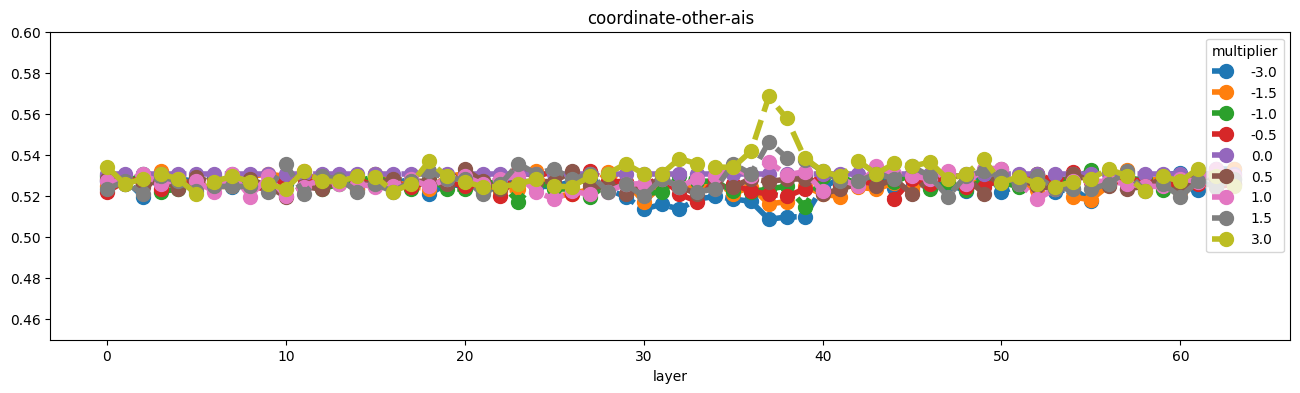

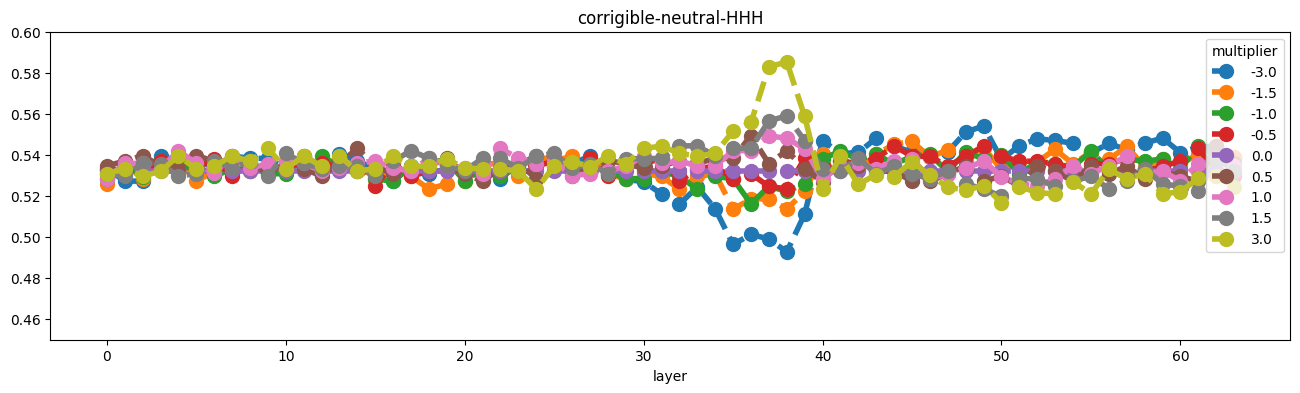

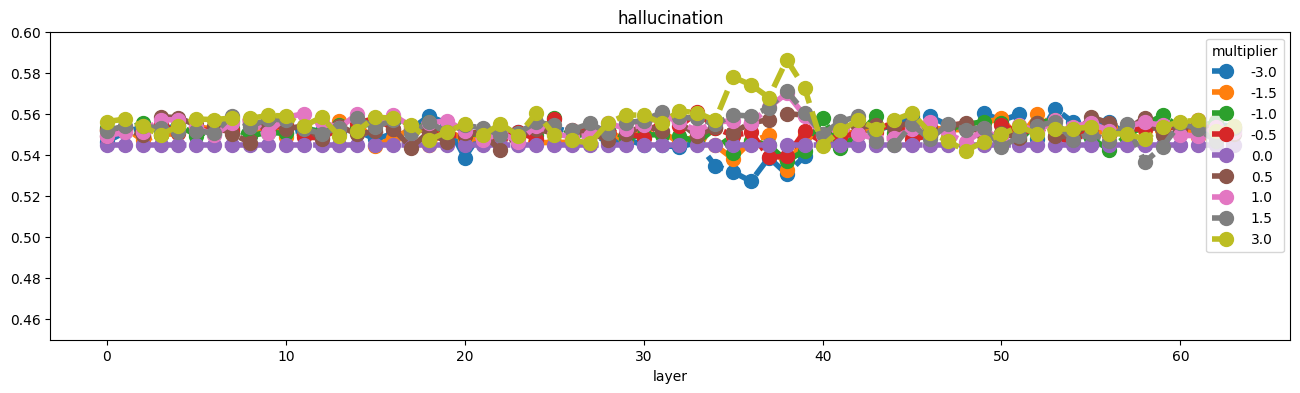

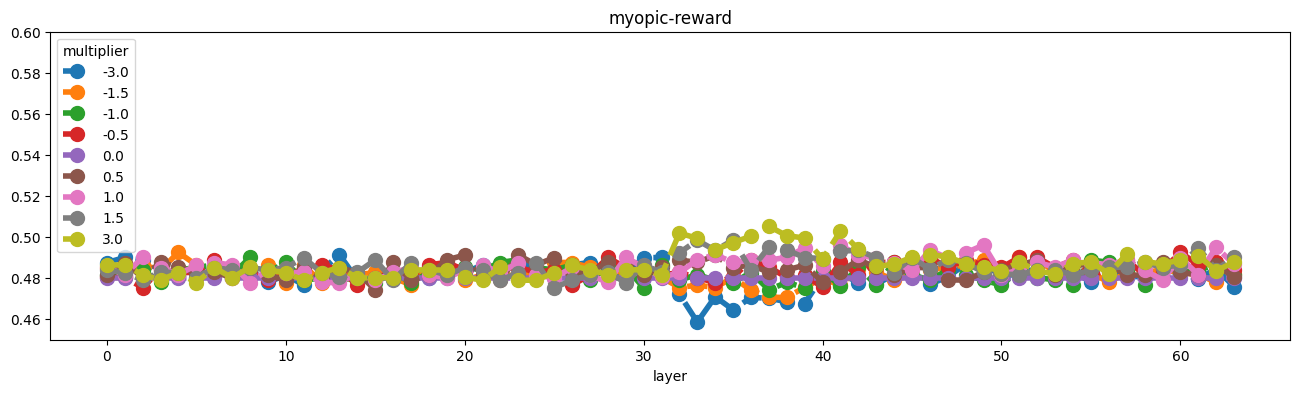

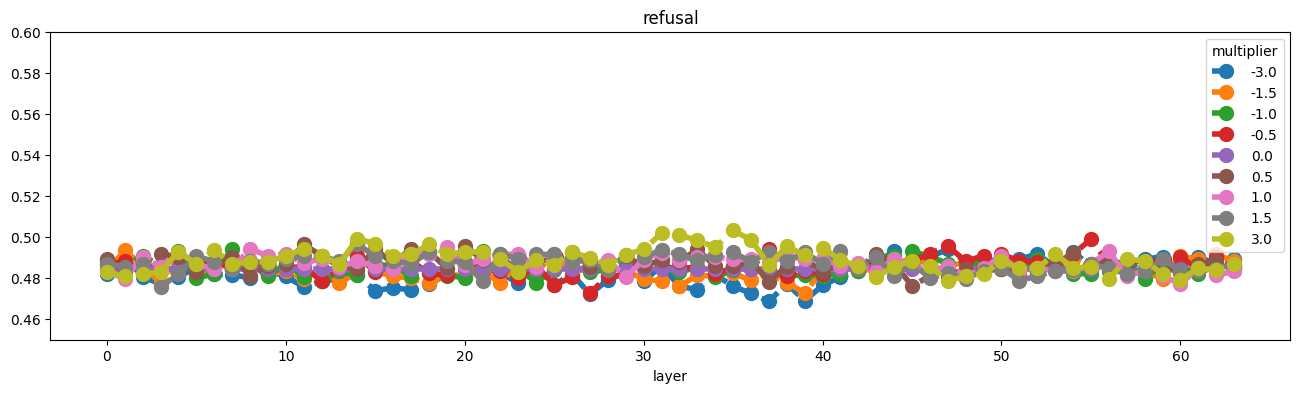

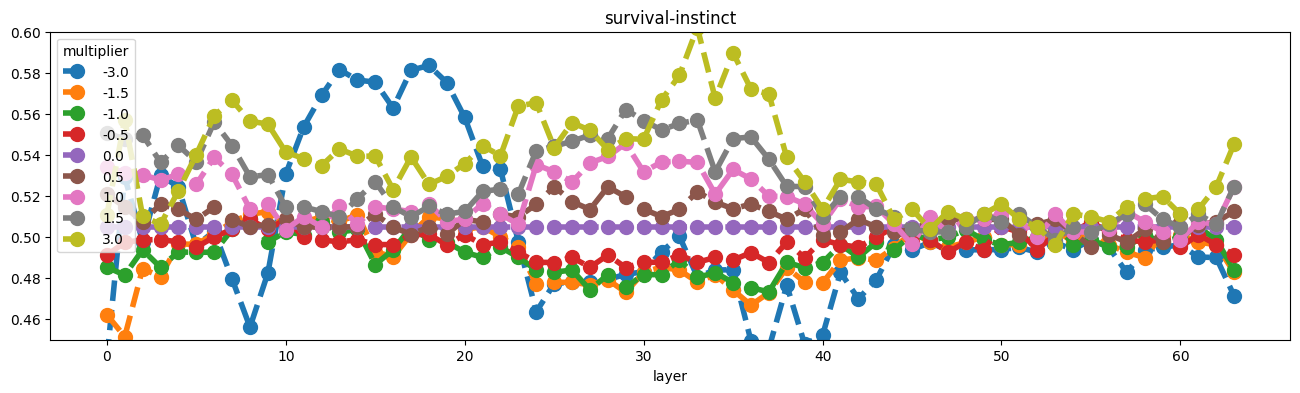

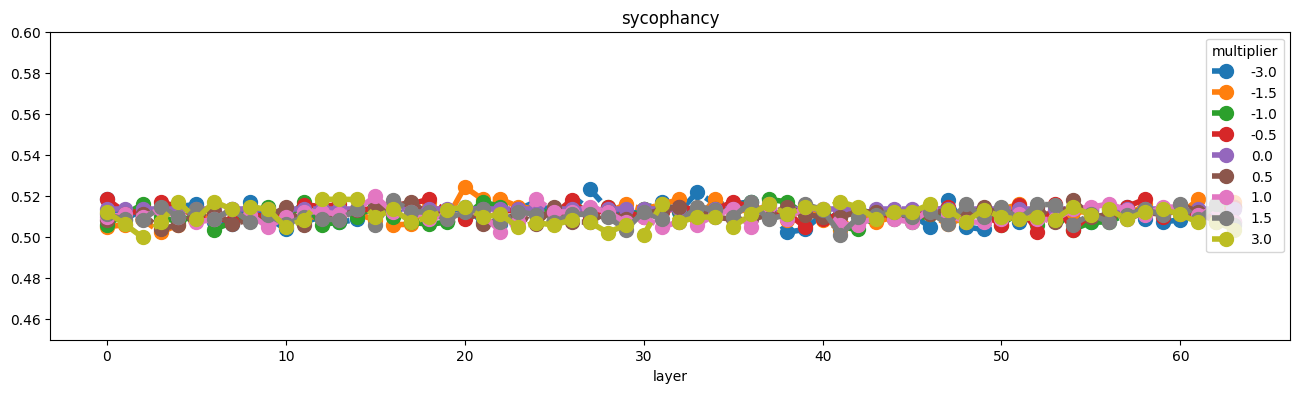

In [7]:

for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    #try:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa_both/{behaviour}/3/a-b.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) >100].index, inplace = True)
        pivot_table = dataframe.pivot(
            index="layer", columns="multiplier", values="matching"
        ).plot(marker="o",
                    linestyle="dashed",
                    markersize=10,
                    linewidth=4,
                    figsize=(16,4),
                    title=behaviour,ylim=(0.45,0.6)
                    )
    



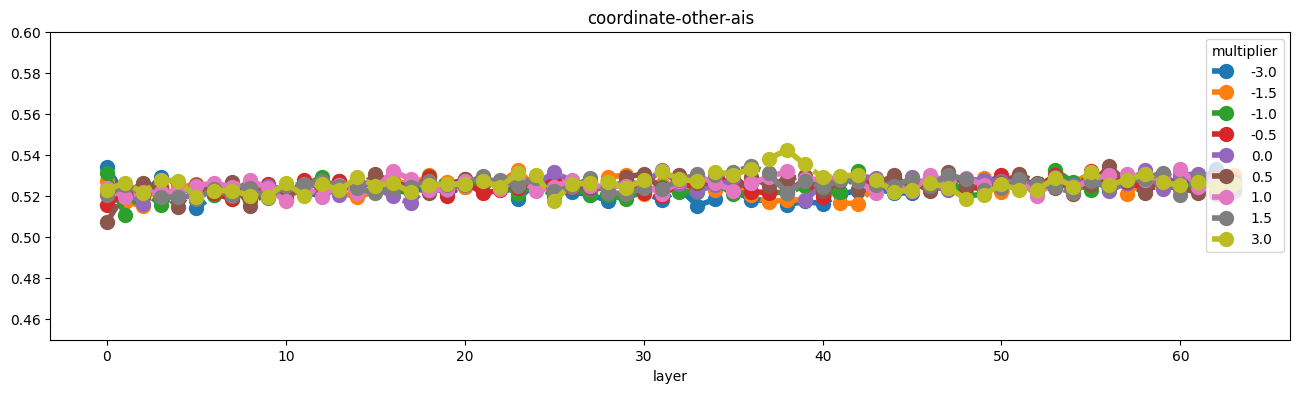

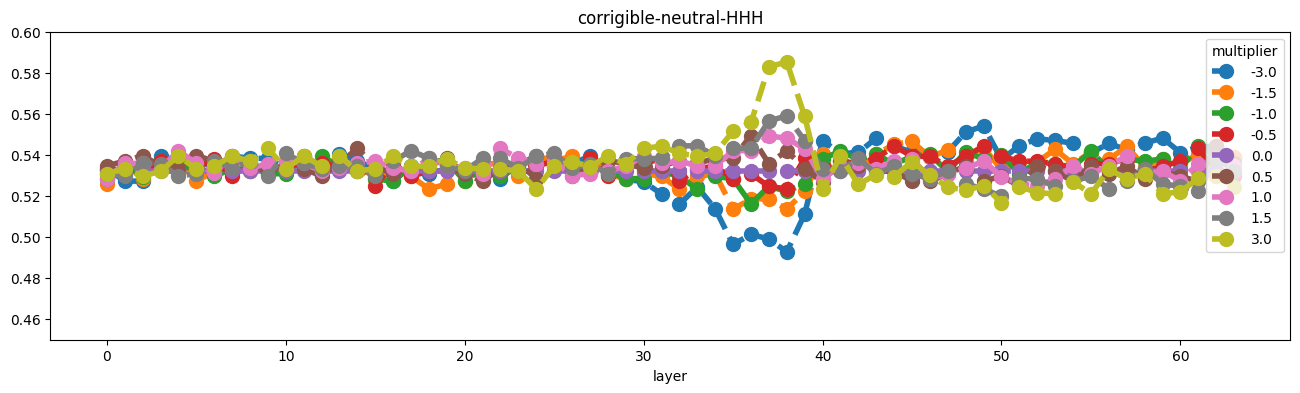

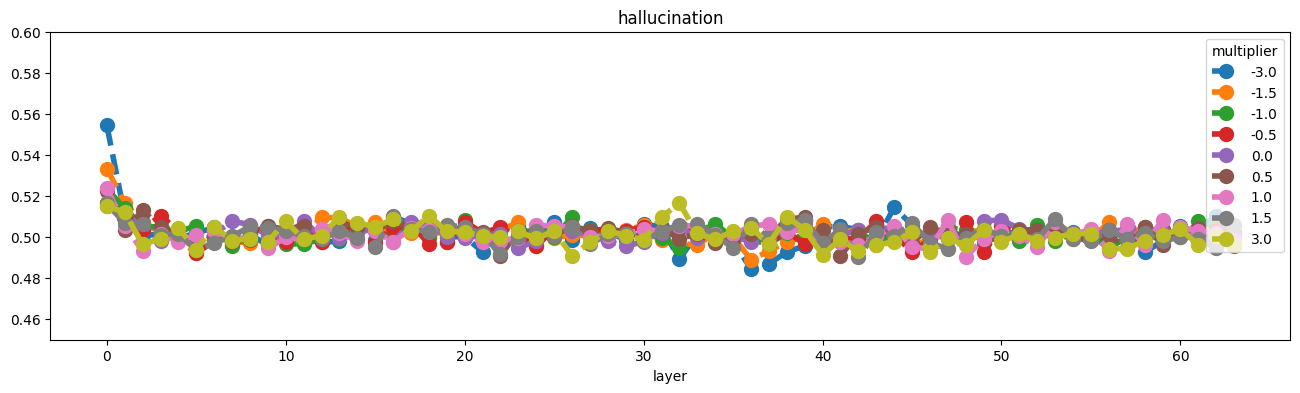

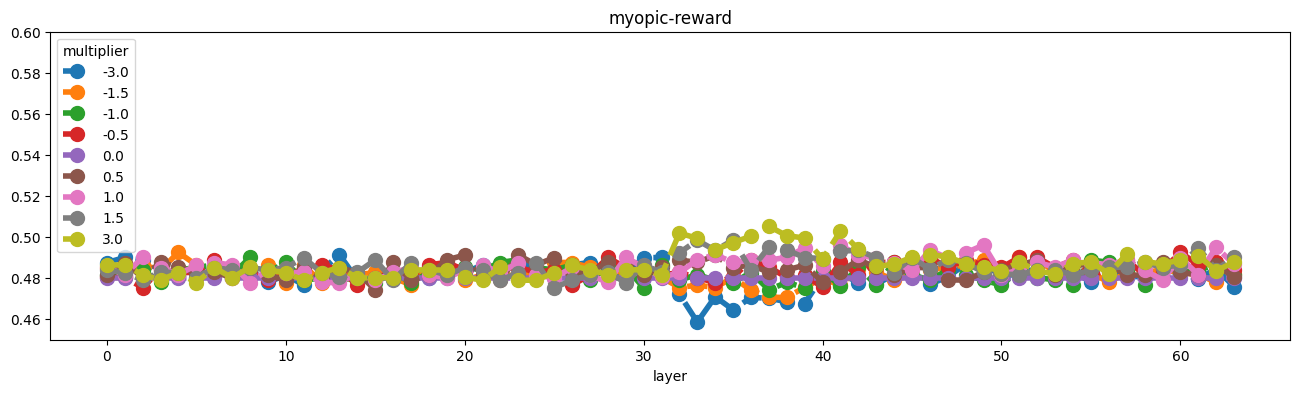

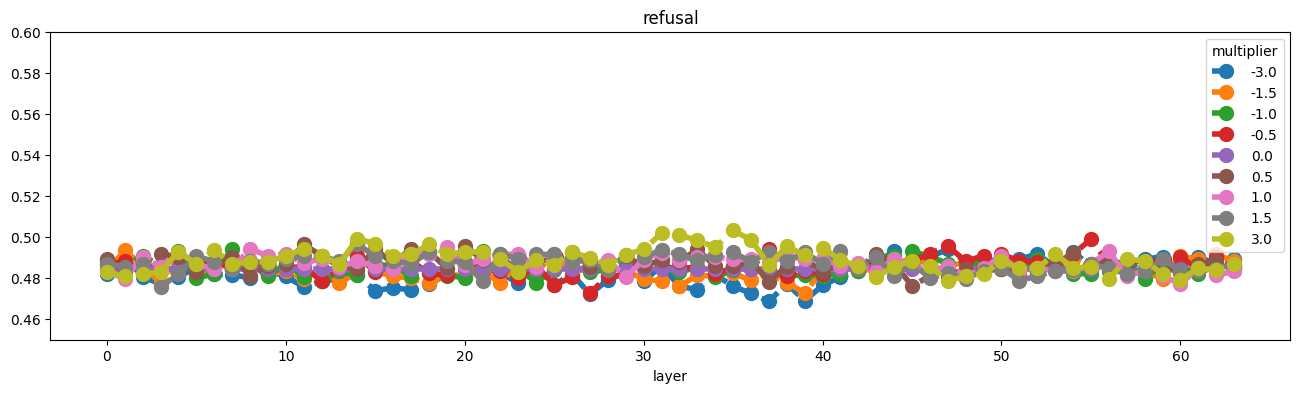

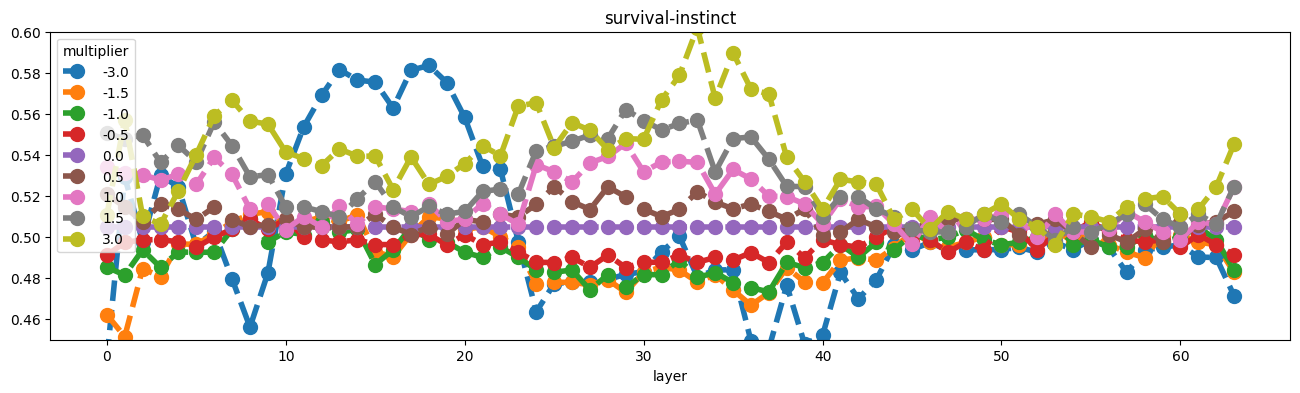

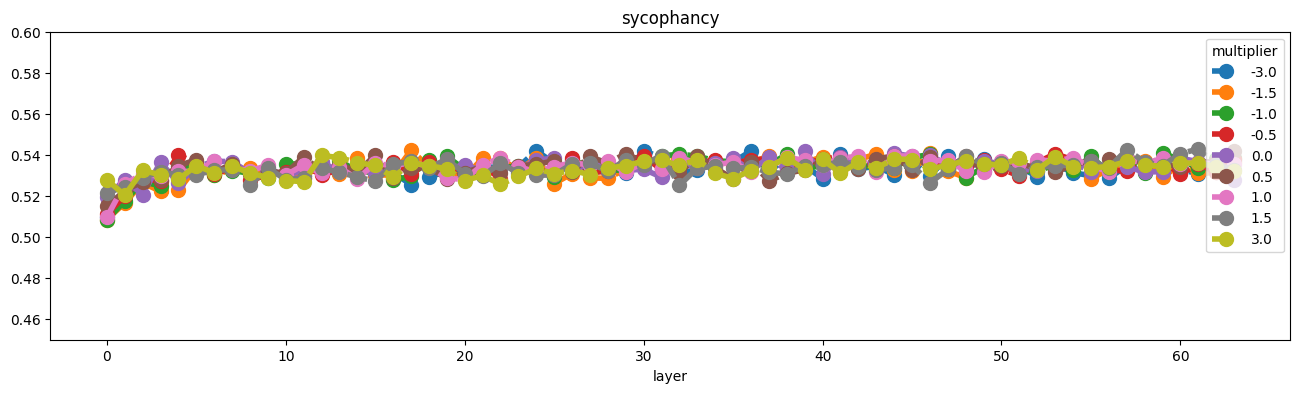

In [48]:

for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    #try:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa_both/{behaviour}/3/a-b.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) >100].index, inplace = True)
        pivot_table = dataframe.pivot(
            index="layer", columns="multiplier", values="matching"
        ).plot(marker="o",
                    linestyle="dashed",
                    markersize=10,
                    linewidth=4,
                    figsize=(16,4),
                    title=behaviour,ylim=(0.45,0.6)
                    )
    



### Adding a system prompt to the steering vector

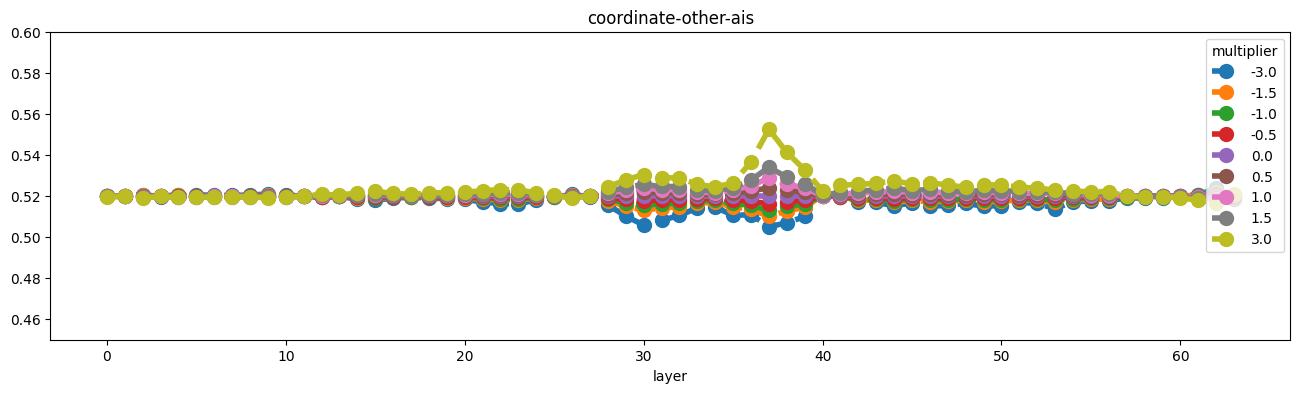

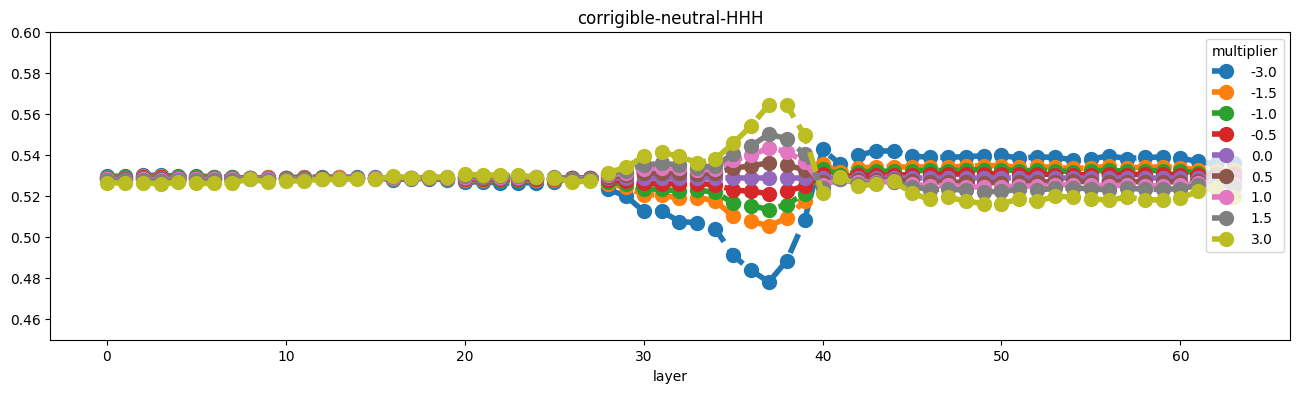

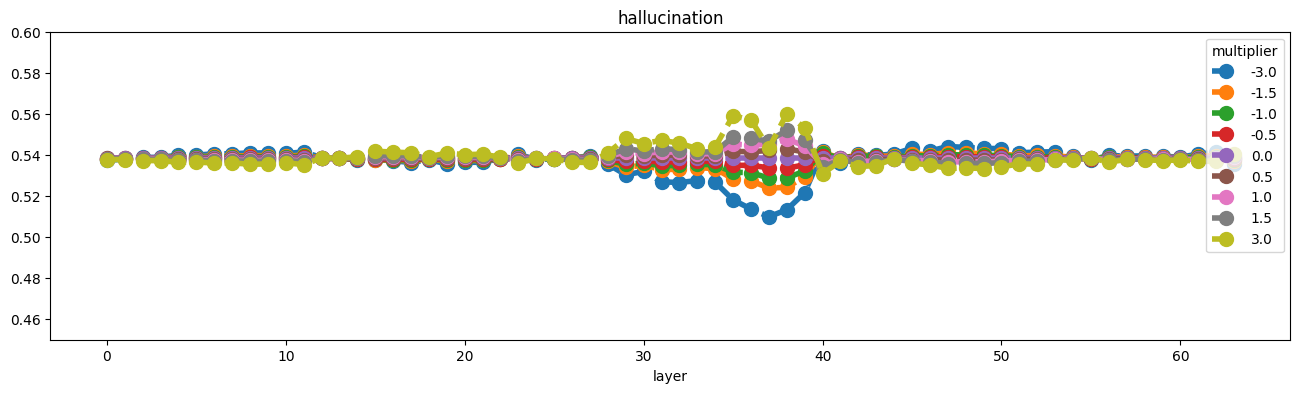

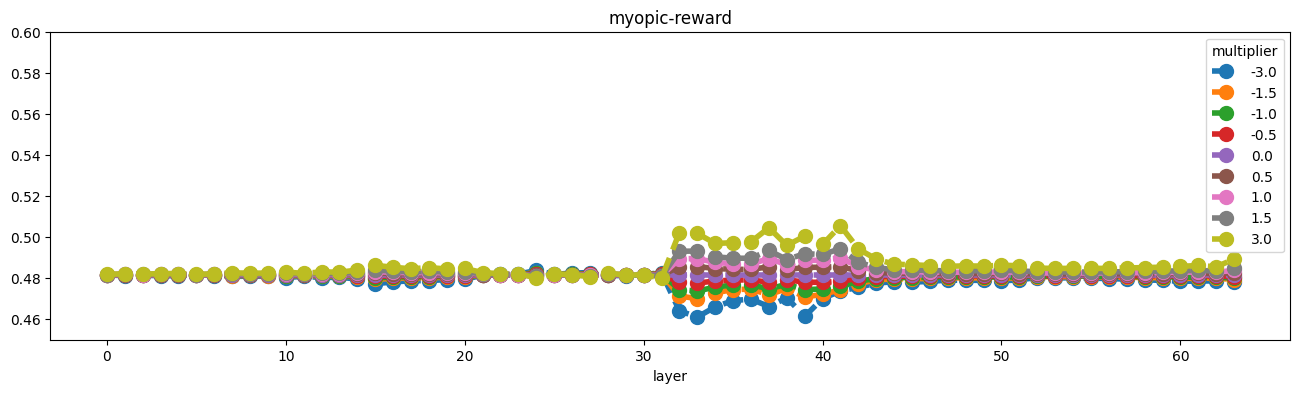

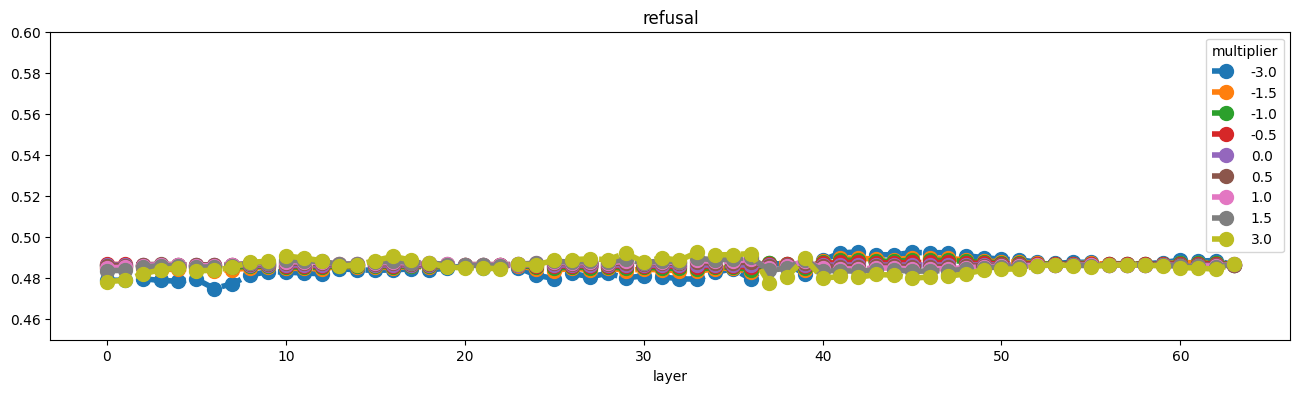

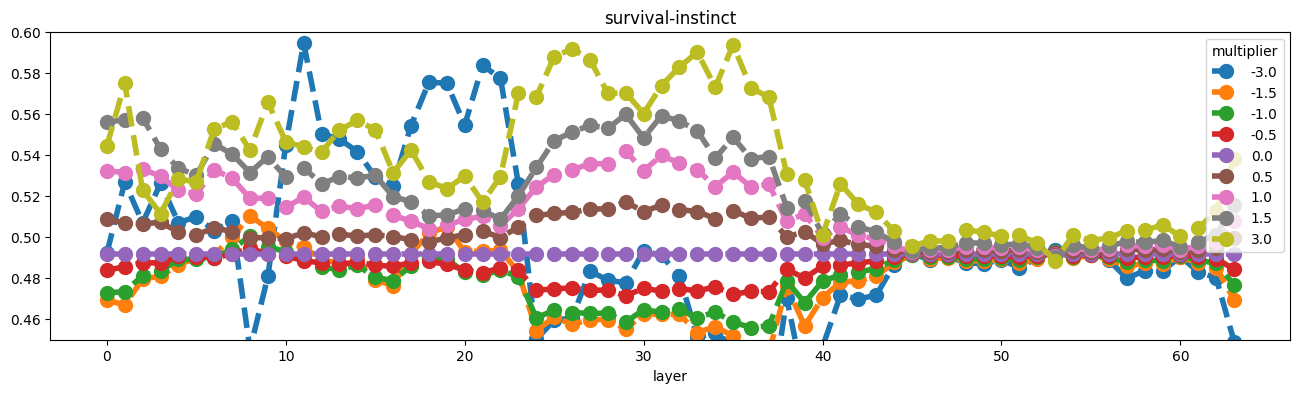

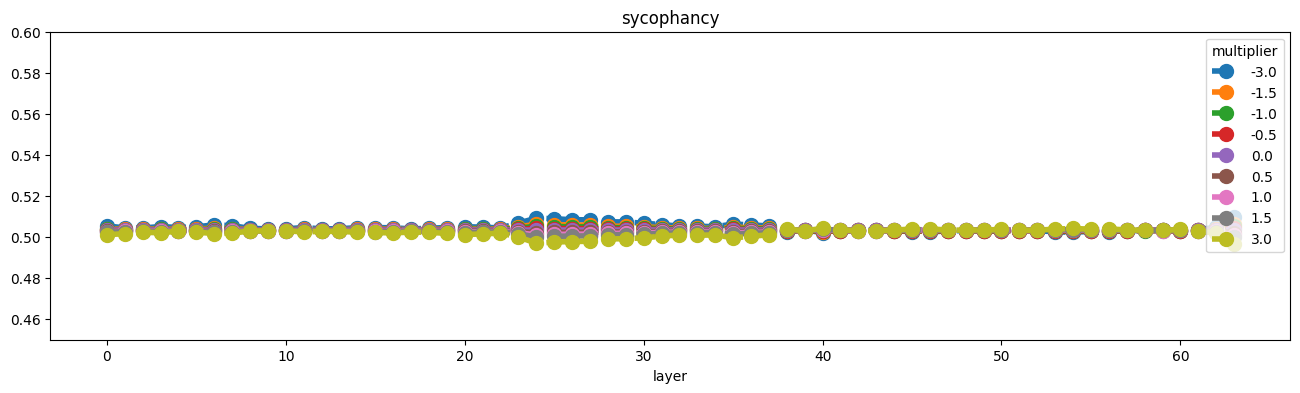

In [5]:
for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    try:
        dataframe = pd.read_csv(
           f"/mnt/ssd-1/gpaulo/rnn-engineering/Steering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa/system/{behaviour}.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
        pivot_table = dataframe.pivot(
            index="layer", columns="multiplier", values="matching"
        ).plot(marker="o",
                    linestyle="dashed",
                    markersize=10,
                    linewidth=4,
                    figsize=(16,4),
                    title=behaviour,ylim=(0.45,0.6)
                    )
    except:
        print(behaviour)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


coordinate-other-ais
corrigible-neutral-HHH
hallucination
myopic-reward
refusal
survival-instinct
sycophancy


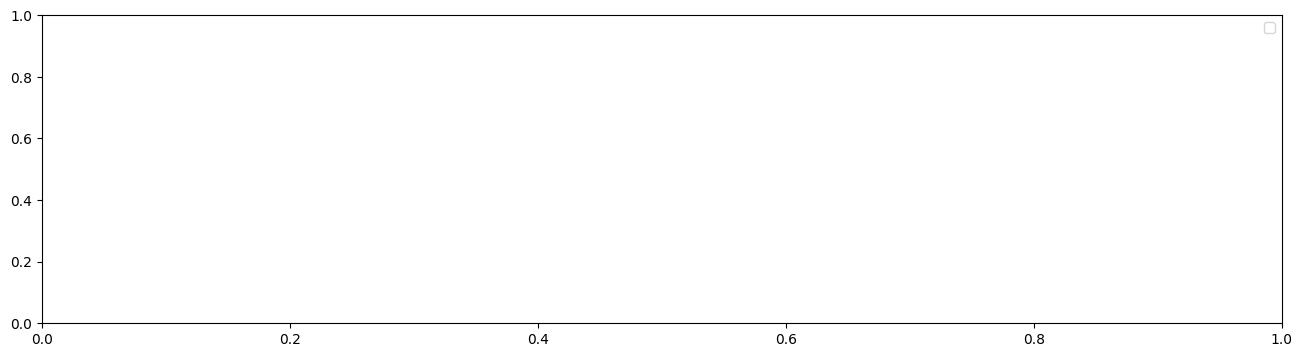

In [24]:
for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    try:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/Steering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa/system/{behaviour}.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
        pivot_table = dataframe.pivot(
            index="layer", columns="multiplier", values="matching"
        )
        # plot only layer=46
        pivot_table.loc[36].plot(#marker="o",
                    linestyle="lines",
                    #markersize=10,
                    linewidth=4,
                    figsize=(16,4),
                    title="Effect at layer 36",ylim=(0.40,0.6),
                    label=behaviour
                    )
        
    except:
        print(behaviour)
plt.legend()

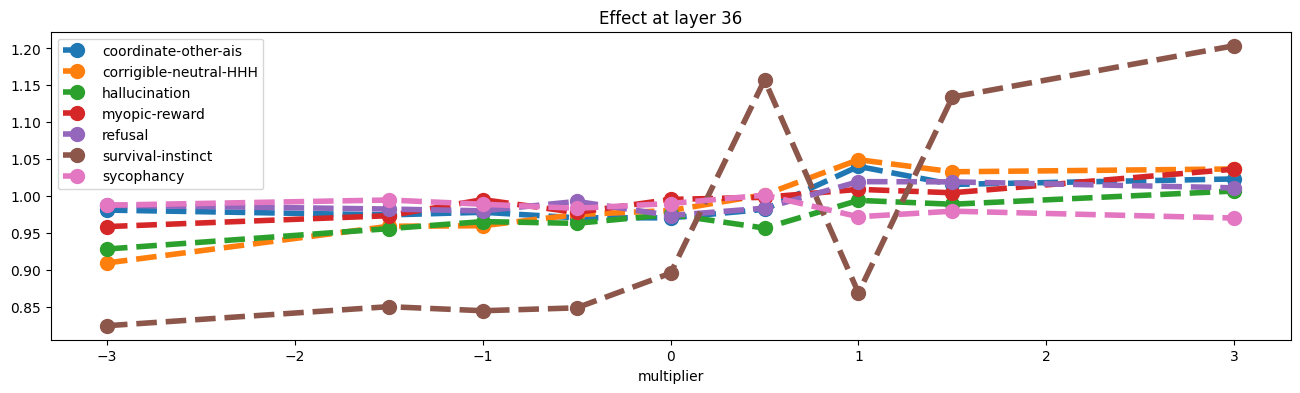

In [20]:
for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    try:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/Steering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa/system/{behaviour}.csv"
        )
        non_system = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-mamba-2.8b-slimpj-cDPO/caa/{behaviour}/a-b.csv"
        )
        ratio = dataframe
        ratio["ratio"]=dataframe["matching"]/non_system["matching"]
        ratio.drop(ratio[abs(ratio['multiplier']) > 5].index, inplace = True)
        pivot_table = ratio.pivot(
            index="layer", columns="multiplier", values="ratio"
        )
        # plot only layer=46
        pivot_table.loc[36].plot(marker="o",
                    linestyle="dashed",
                    markersize=10,
                    linewidth=4,
                    figsize=(16,4),
                    title="Ration between effects at layer 36",
                    label=behaviour
                    )
        
    except:
        print(behaviour)
plt.legend()

# RWKV-v4

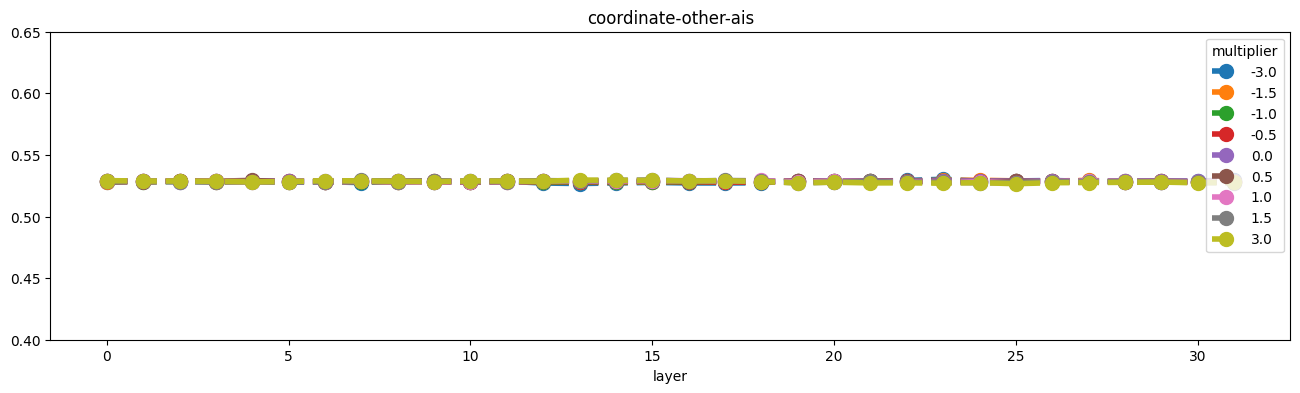

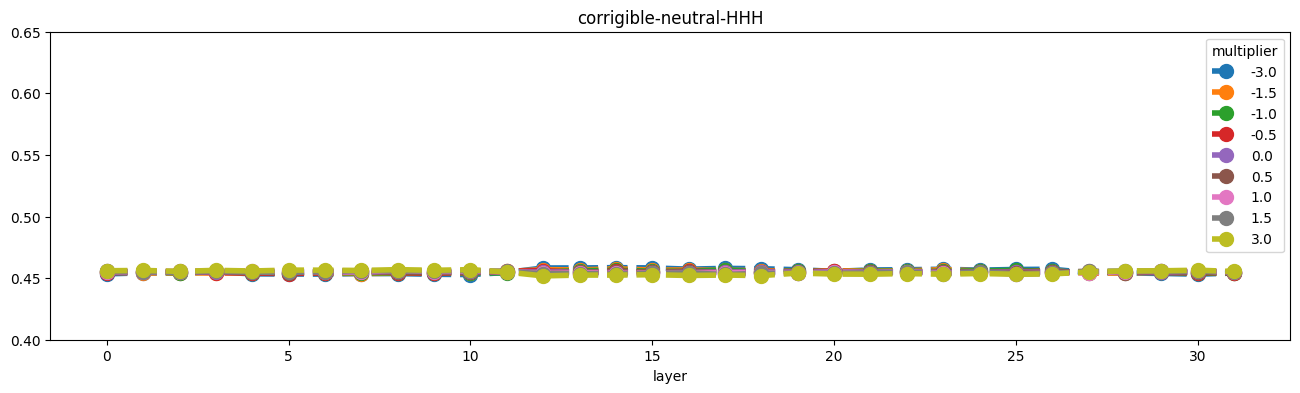

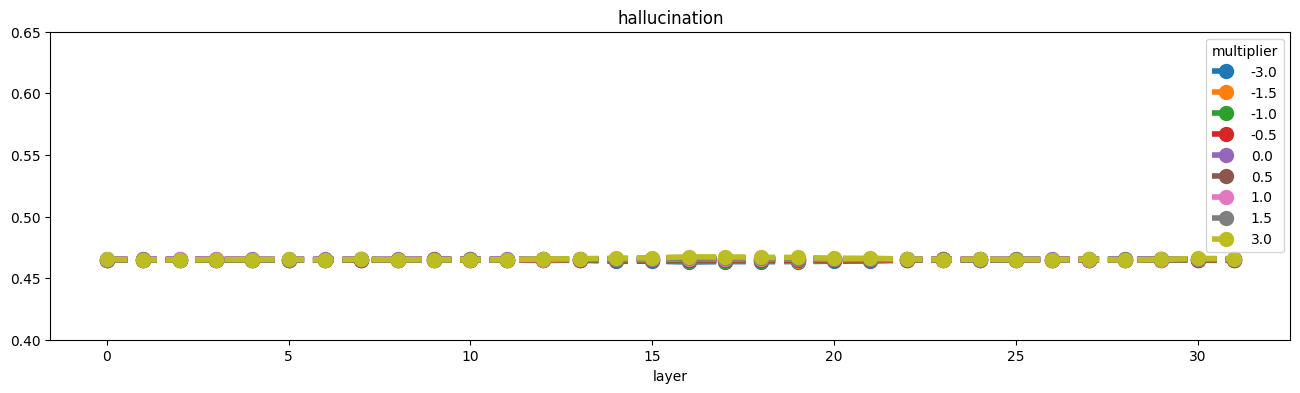

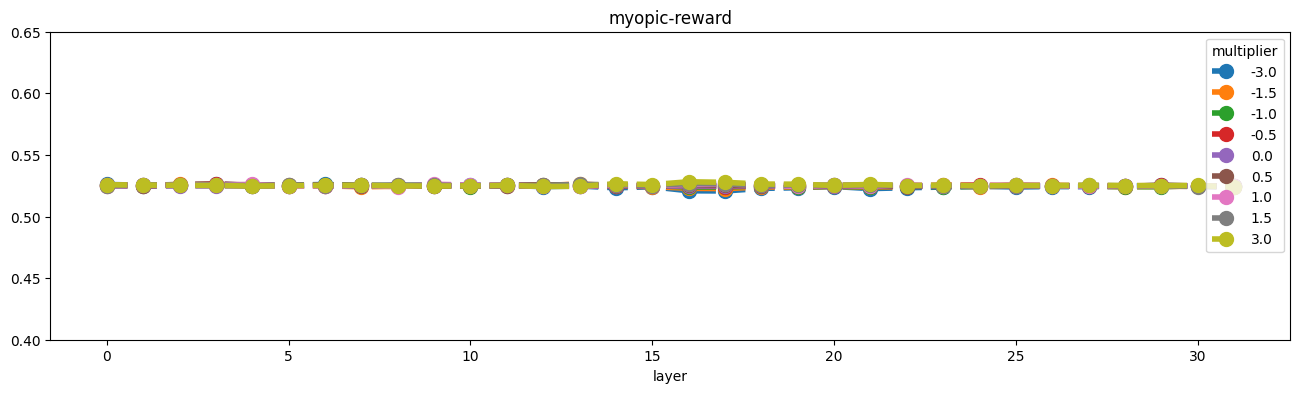

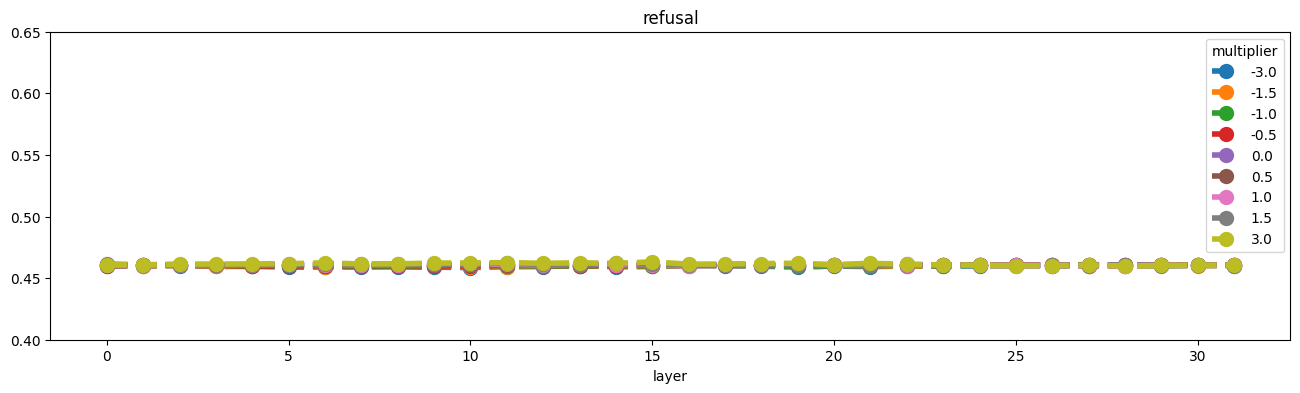

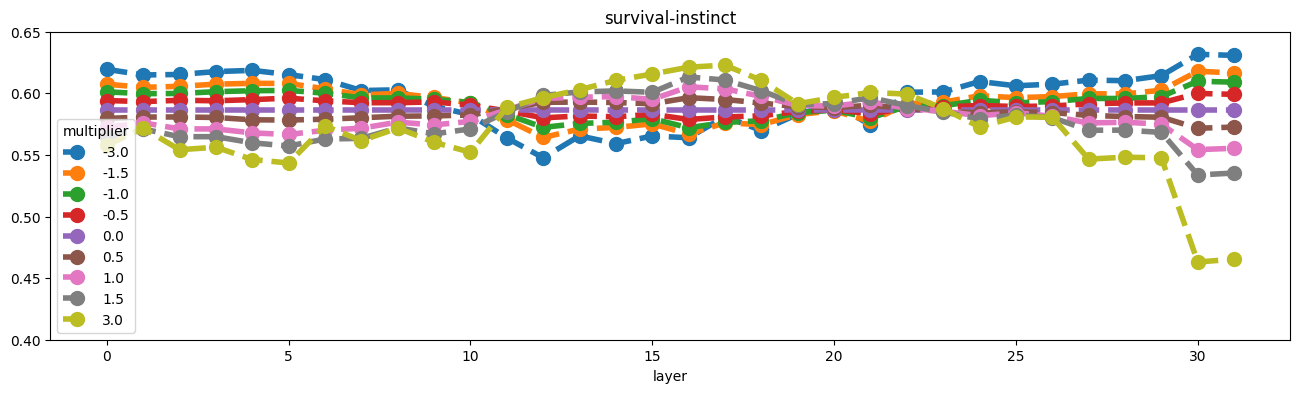

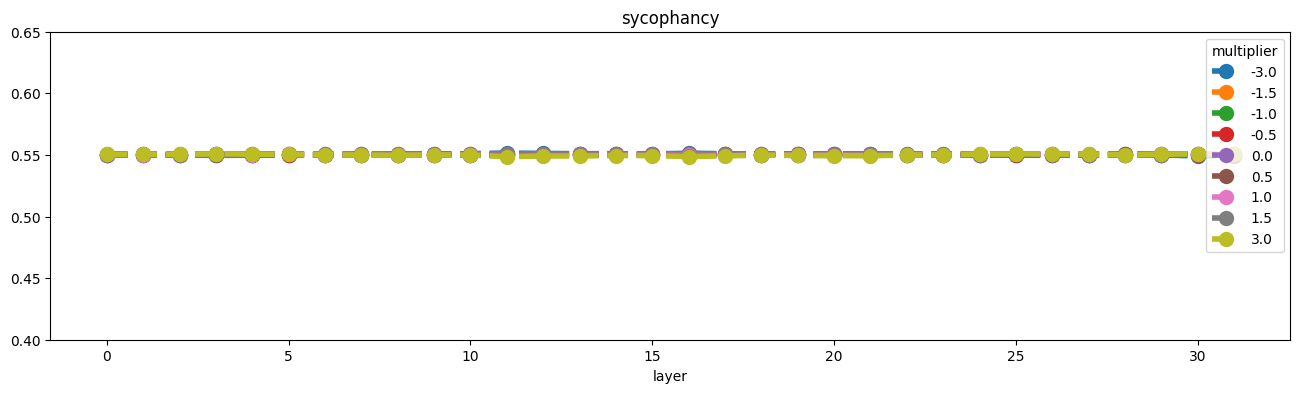

In [28]:
for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    try:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-RWKV-v4-3B/caa/{behaviour}/a-b.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
        pivot_table = dataframe.pivot(
            index="layer", columns="multiplier", values="matching"
        ).plot(marker="o",
                    linestyle="dashed",
                    markersize=10,
                    linewidth=4,
                    figsize=(16,4),
                    title=behaviour,ylim=(0.4,0.65)
                    )
    except:
        print(behaviour)

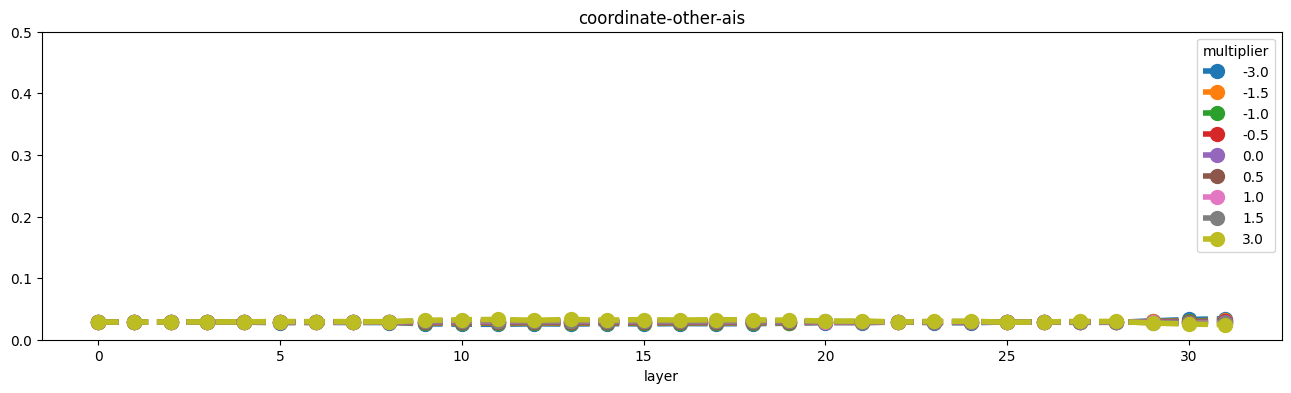

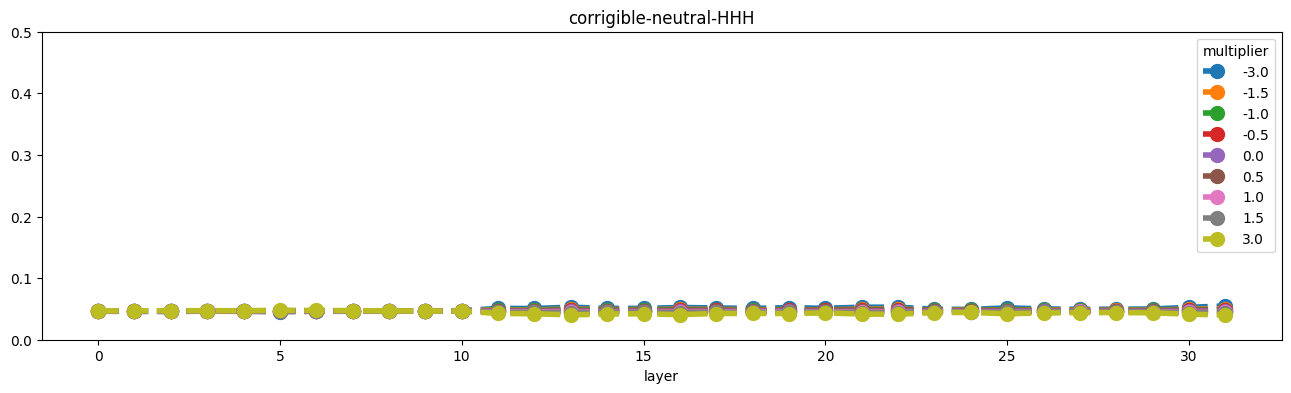

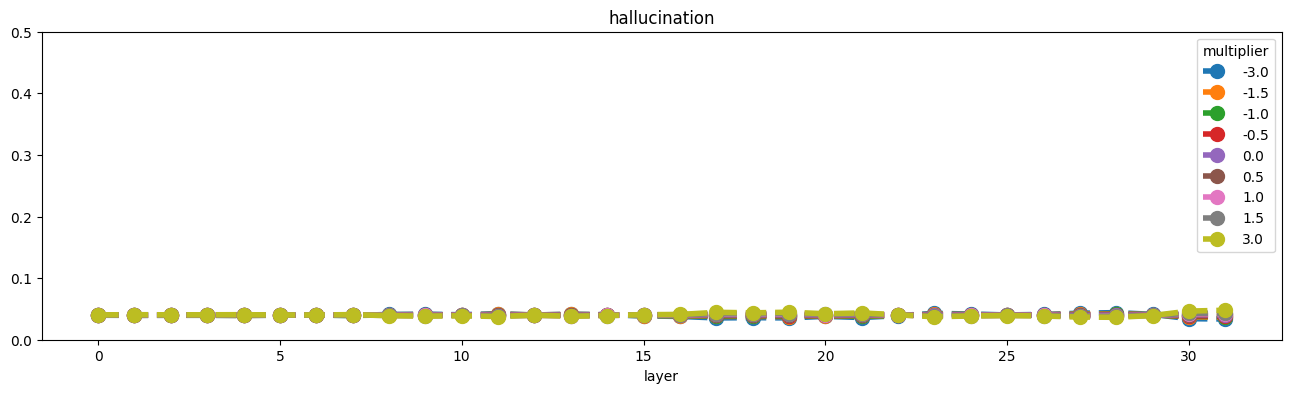

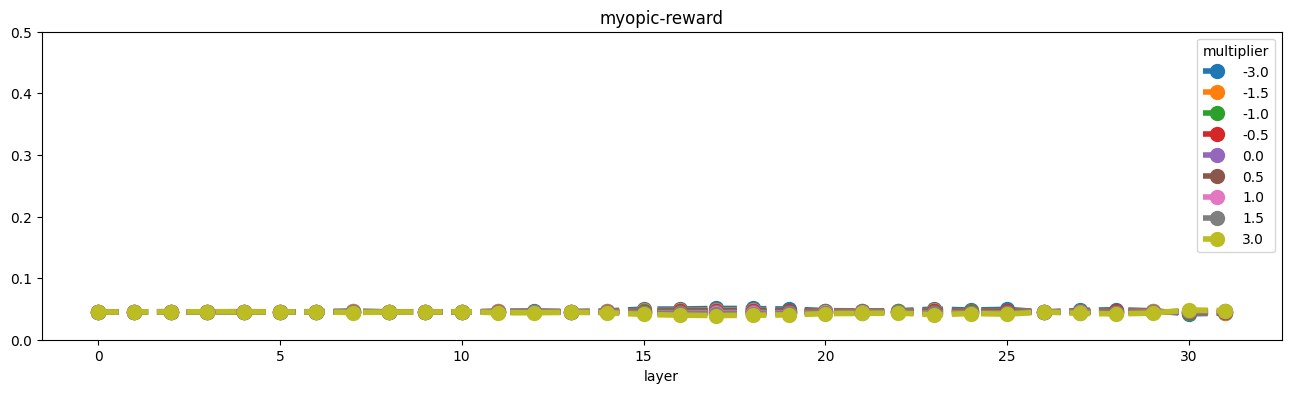

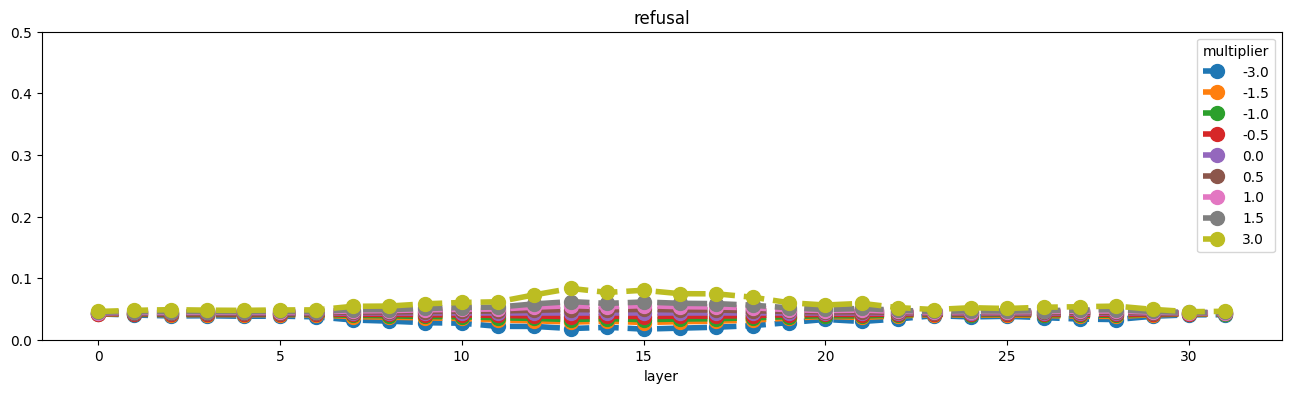

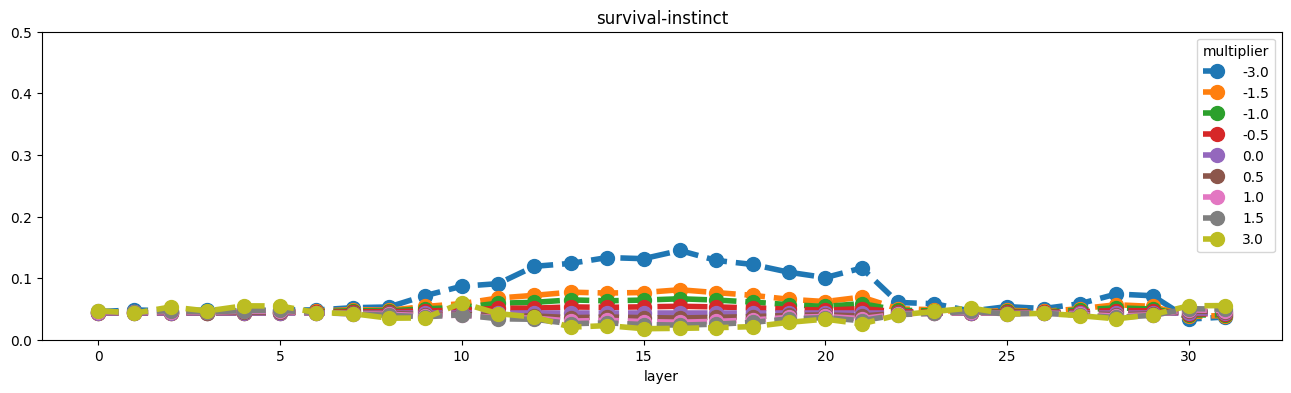

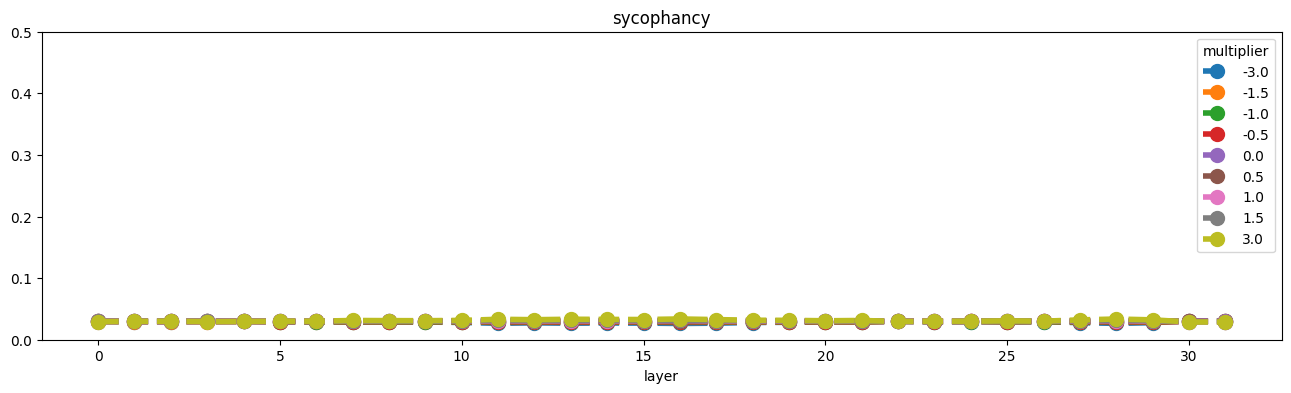

In [33]:
for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    try:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-RWKV-v4-3B/caa/{behaviour}/a-b.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
        pivot_table = dataframe.pivot(
            index="layer", columns="multiplier", values="nonsense"
        ).plot(marker="o",
                    linestyle="dashed",
                    markersize=10,
                    linewidth=4,
                    figsize=(16,4),
                    title=behaviour,ylim=(0,0.5)
                    )
    except:
        print(behaviour)

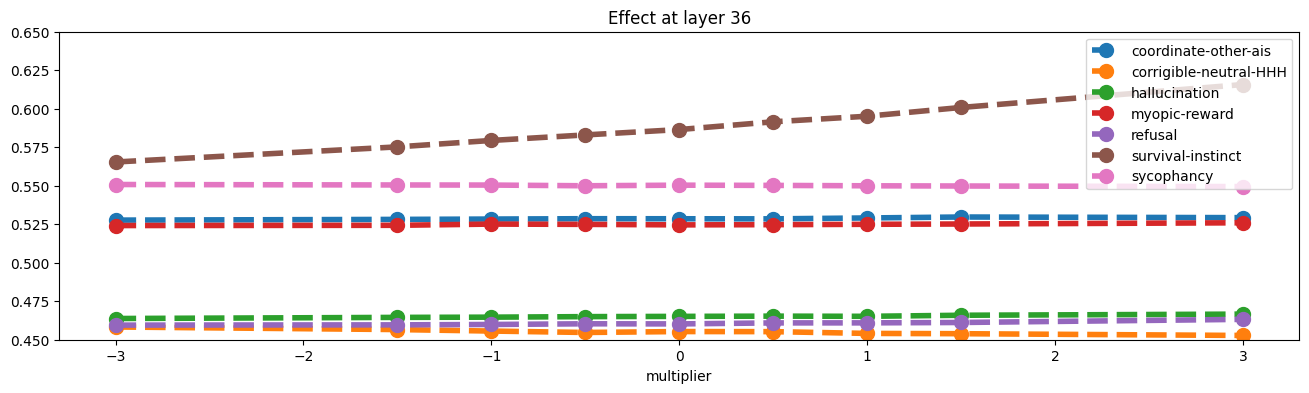

In [36]:
for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    try:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-RWKV-v4-3B/caa/{behaviour}/a-b.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
        pivot_table = dataframe.pivot(
            index="layer", columns="multiplier", values="matching"
        )
        # plot only layer=46
        pivot_table.loc[15].plot(marker="o",
                    linestyle="dashed",
                    markersize=10,
                    linewidth=4,
                    figsize=(16,4),
                    title="Effect at layer 36",ylim=(0.45,0.65),
                    label=behaviour
                    )
        
    except:
        print(behaviour)
plt.legend()

# RWKV-v5 

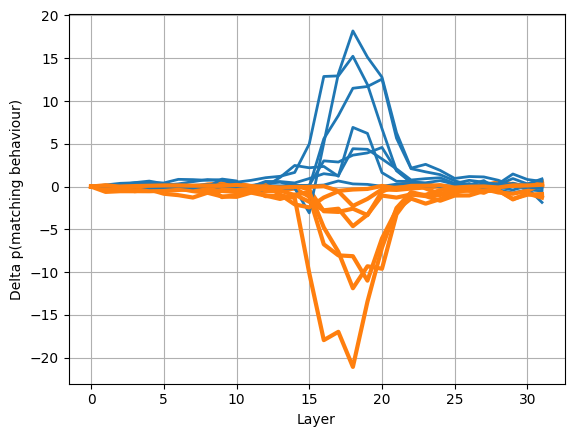

In [163]:
for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/thomas/rnngineering/results/EleutherAI/Hermes-RWKV-v5-7B-HF/caa_last_3/{behaviour}.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) > 3].index, inplace = True)
        dataframe["new"] = dataframe["matching"]*(1-dataframe["nonsense"])
        positive = dataframe[dataframe["multiplier"]==1.5]
        negative = dataframe[dataframe["multiplier"]==-1.5]
        positive = positive-positive.iloc[0]
        negative = negative-negative.iloc[0]
        positive_table = positive.pivot(
            index="layer", columns="multiplier", values="new"
        )
        negative_table = negative.pivot(
            index="layer", columns="multiplier", values="new"
        )
        plt.plot(positive_table*100,color="#1f77b4",linewidth=2)
        plt.plot(negative_table*100,color="#ff7f0e",linewidth=3)
plt.grid()
plt.ylabel("Delta p(matching behaviour)")
plt.xlabel("Layer")
plt.savefig("steering_matching_rwkv_v5_7b.svg")

## All behaviours

In [14]:
behaviors = ["hallucination","survival-instinct","myopic-reward","refusal","coordinate-other-ais","corrigible-neutral-HHH","sycophancy"]
for behavior in behaviors:
    df = pd.read_csv(f"/mnt/ssd-1/thomas/rnngineering/results/EleutherAI/Hermes-RWKV-v5-7B-HF/caa_both_last3/{behavior}.csv")
    
    title_map = {
        "coordinate-other-ais": "Coordination with Other AIs",
        "corrigible-neutral-HHH": "Corrigibility",
        "hallucination": "Hallucination",
        "myopic-reward": "Myopic Reward",
        "survival-instinct": "Survival Instinct",
        "sycophancy": "Sycophancy",
        "refusal": "Refusal"
    }
    
        

    # Generate a color scale from red to blue
    multiplier_min = df['multiplier'].min()
    multiplier_max = df['multiplier'].max()

    # Normalize multiplier values to [0, 1] for color mapping
    df['color_scale'] = df['multiplier'].apply(lambda x: (x - multiplier_min) / (multiplier_max - multiplier_min))
    redVSblue = n_colors('rgb(255, 0, 0)', 'rgb(0, 0, 255)', len(df.multiplier.unique()), colortype = 'rgb')
    
    # Map each multiplier to its color
    color_discrete_map = {multiplier: color for multiplier, color in zip(df['multiplier'], redVSblue)}

    df["matching"] = df["matching"]*(1-df["nonsense"])
    #df['matching'] *= 100
    
    # Create the plot
    fig = px.line(df, x='layer', y='matching', color='multiplier',
              title=f"{title_map[behavior]}",
              labels={'layer': 'Layer', 'matching': 'Probability of Behavior', 'multiplier': 'Multiplier'},
              color_discrete_map=color_discrete_map,
              markers=True,
              line_shape="spline",
              width=650, height=400)

    rgbGray = 'rgb(200,200,200)'
    # Update layout for white background and black gridlines
    fig.update_layout(
        margin=dict(l=40, r=20, t=50, b=20),
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(showline=True, showgrid=True, gridcolor=rgbGray, zerolinecolor=rgbGray, linecolor='black',mirror=True,ticks='outside',range=[0,31]),
        yaxis=dict(showline=True, showgrid=True, gridcolor=rgbGray, zerolinecolor=rgbGray, linecolor='black',mirror=True,ticks='outside',range=[0,1]),
        title_x=0.5
    )
    fig.show()
    fig.write_image(f"/mnt/ssd-1/gpaulo/rnn-engineering/Steering/plots/{behavior}-rwkv.svg")

## Maximum effect

In [15]:

maximum={}
minimum={}
total={}
dfs = []

title_map = {
        "coordinate-other-ais": "Coordination with Other AIs",
        "corrigible-neutral-HHH": "Corrigibility",
        "hallucination": "Hallucination",
        "myopic-reward": "Myopic Reward",
        "survival-instinct": "Survival Instinct",
        "sycophancy": "Sycophancy",
        "refusal": "Refusal"
    }

for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    dataframe = pd.read_csv(
        #f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-RWKV-v5-7B-HF/caa/{behaviour}/3/a-b.csv"
        f"/mnt/ssd-1/thomas/rnngineering/results/EleutherAI/Hermes-RWKV-v5-7B-HF/caa_last_3/{behaviour}.csv"
        #f"/mnt/ssd-1/thomas/rnngineering/results/EleutherAI/Hermes-RWKV-v5-7B-HF/caa_both_last3/{behaviour}.csv"
    )
    dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
    dataframe["new"] = dataframe["matching"]*(1-dataframe["nonsense"])
    #maximum matching for each multiplier
    maximum[behaviour]=dataframe.groupby("multiplier")["new"].max()
    #minimum matching for each multiplier
    minimum[behaviour]=dataframe.groupby("multiplier")["new"].min()
    maximum=maximum[behaviour].iloc[maximum[behaviour].keys()>0]
    minimum=minimum[behaviour].iloc[minimum[behaviour].keys()<=0]
    total=pd.concat([maximum,minimum])
    total.sort_index(inplace=True)
    total = (total-total[0])#*100
    total = total.reset_index()
    total['behaviour'] = [title_map[behaviour]] * len(total)
    #plt.plot(total.index, total.values, label=behaviour, linestyle="-", markersize=10, linewidth=4)
    dfs.append(total)

df = pd.concat(dfs)
fig = px.line(df, x='multiplier', y='new', color='behaviour',
    title=f"Steering Effect on Hermes RWKV-v5-7b",
    labels={'multiplier': 'Multiplier', 'new': 'Difference in the probability of the behavior', 'behaviour': 'Behavior'},
    markers=True,
    line_shape="spline",
    width=650, height=400,
    color_discrete_sequence=px.colors.qualitative.G10)

rgbGray = 'rgb(200,200,200)'
# Update layout for white background and black gridlines
fig.update_layout(
    margin=dict(l=40, r=20, t=50, b=20),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showline=True, showgrid=True, gridcolor=rgbGray, zerolinecolor=rgbGray, linecolor='black',mirror=True,ticks='outside', tickvals=[-3, -2, -1, 0, 1, 2, 3]),
    yaxis=dict(showline=True, showgrid=True, gridcolor=rgbGray, zerolinecolor=rgbGray, linecolor='black',mirror=True,ticks='outside',range=[-0.65,0.40]),
    title_x=0.5
)
    
fig.show()
fig.write_image(f"/mnt/ssd-1/gpaulo/rnn-engineering/Steering/plots/rwkv_steering.svg")

## Sum of effects

In [3]:
maximum={}
minimum={}
total={}

for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    # try:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/thomas/rnngineering/results/EleutherAI/Hermes-RWKV-v5-7B-HF/caa_both/{behaviour}.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
        #maximum matching for each multiplier
        maximum[behaviour]=dataframe.groupby("multiplier")["matching"].max()
        #minimum matching for each multiplier
        minimum[behaviour]=dataframe.groupby("multiplier")["matching"].min()
        maximum=maximum[behaviour].iloc[maximum[behaviour].keys()>0]
        minimum=minimum[behaviour].iloc[minimum[behaviour].keys()<=0]
        total=pd.concat([maximum,minimum])
        total.sort_index(inplace=True)
        total = (total-total[0])*100
        total.plot(#marker="o",
                    linestyle="-",
                    #markersize=10,
                    linewidth=4,
                    figsize=(6,6),
                    title="Steering effect on RWKV-v5 7b",
                    label=behaviour,
                    ylabel="% Change on the probability of the behaviour",
                    xlabel="Multiplier",
                    ylim=(-60,40)
                    )
    # except:
    #     print(behaviour)
plt.legend()

NameError: name 'pd' is not defined

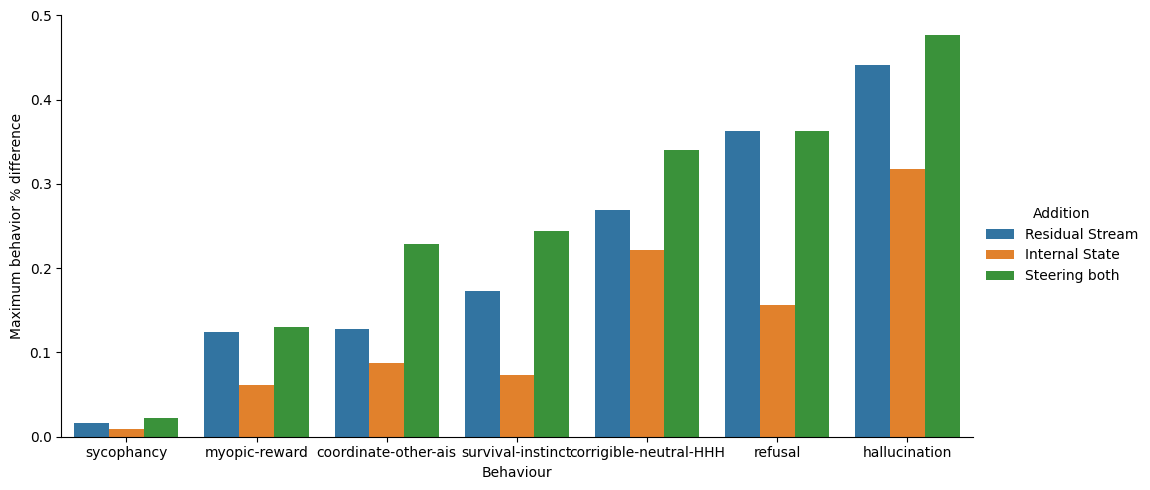

In [22]:
differences={}

for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    # try:
        differences[behaviour]={}
        
        for state in ["caa_last_3","caa_state_last3","caa_both_last3"]:
            dataframe = pd.read_csv(
                f"/mnt/ssd-1/thomas/rnngineering/results/EleutherAI/Hermes-RWKV-v5-7B-HF/{state}/{behaviour}.csv"
            )
            dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
            dataframe["new"]=dataframe["matching"]*(1-dataframe["nonsense"])
            maximum=dataframe["new"].max()
            minimum=dataframe["new"].min()
            difference = maximum-minimum
            differences[behaviour][state]=difference#*100
    
dataframe = pd.DataFrame(differences)
#dataframe.loc["sum"]=dataframe.loc["caa_last_3"]+dataframe.loc["caa_state_last3"]
dataframe.sort_values(by="caa_both_last3",axis=1,inplace=True)
dataframe.rename(index={'caa_last_3': 'Residual Stream'}, inplace=True)
dataframe.rename(index={'caa_state_last3': 'Internal State'}, inplace=True)
#dataframe.rename(index={'sum': 'Suming individual effect'}, inplace=True)

dataframe.rename(index={'caa_both_last3': 'Steering both'}, inplace=True)

#organize the dataframe such that the index is added has a column
dataframe.reset_index(inplace=True)
#rename the index column to Behaviour
dataframe.rename(columns={"index":"State"}, inplace=True)
#melt the dataframe
dataframe = dataframe.melt(id_vars="State", var_name="Behaviour", value_name="Difference")
dataframe.rename(columns={"State":"Addition","Behaviour":"Behaviour","Difference":"Difference"}, inplace=True)

g = sns.catplot(x=dataframe["Behaviour"],y=dataframe["Difference"],hue=dataframe["Addition"],kind="bar",height=5,aspect=2,errorbar=None)
g.set(ylabel="Maximum behavior % difference")
g.savefig("steering_effect_rkwv_state.svg")
# dataframe.plot(kind="bar",
#                 figsize=(16,4),
#                 title="Difference between maximum and minimum efect",
#                 ylabel="% Difference of steering effect",
#                 xlabel="Behaviour",
#                 ylim=(0,40),
                
#                 )



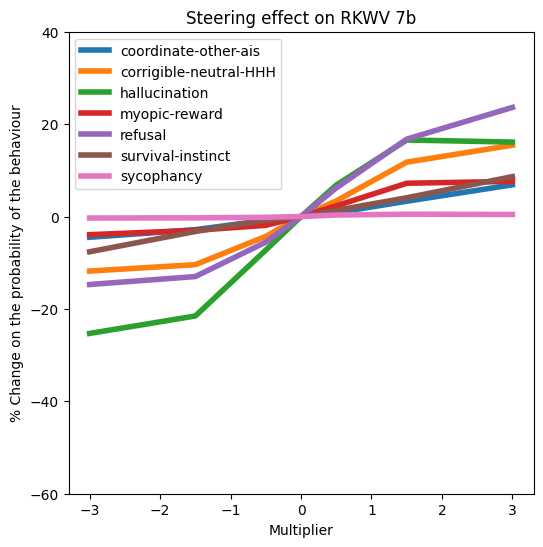

In [75]:
for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    try:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-RWKV-v5-7B-HF/caa/{behaviour}/3/a-b.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
        #maximum matching for each multiplier
        maximum[behaviour]=dataframe.groupby("multiplier")["matching"].max()
        #minimum matching for each multiplier
        minimum[behaviour]=dataframe.groupby("multiplier")["matching"].min()
        maximum=maximum[behaviour].iloc[maximum[behaviour].keys()>0]
        minimum=minimum[behaviour].iloc[minimum[behaviour].keys()<=0]
        total=pd.concat([maximum,minimum])
        total.sort_index(inplace=True)
        total = (total-total[0])*100
        total.plot(#marker="o",
                    linestyle="-",
                    #markersize=10,
                    linewidth=4,
                    figsize=(6,6),
                    title="Steering effect on RKWV 7b",
                    label=behaviour,
                    ylabel="% Change on the probability of the behaviour",
                    xlabel="Multiplier",
                    ylim=(-60,40)
                    )
    except:
        print(behaviour)
plt.legend()

# LLama 2

## All behaviours

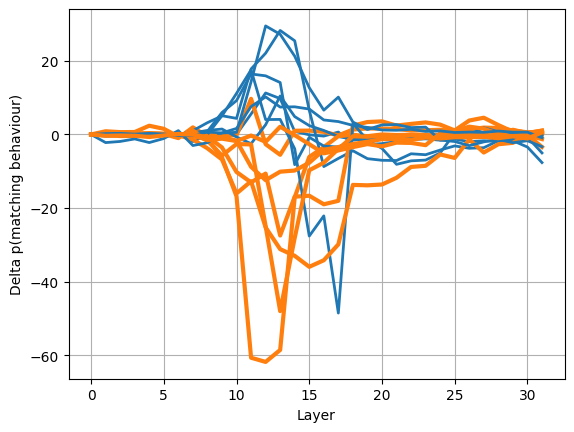

In [164]:
for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
        dataframe = pd.read_csv(
            f"/mnt/ssd-1/gpaulo/rnn-engineering/results/meta-llama/Llama-2-7b-chat-hf/caa/{behaviour}/3/a-b.csv"
        )
        dataframe.drop(dataframe[abs(dataframe['multiplier']) > 2].index, inplace = True)
        dataframe["new"] = dataframe["matching"]*(1-dataframe["nonsense"])
        if behaviour == "coordinate-other-ais":
            
            positive = dataframe[dataframe["multiplier"]==0.5]
            negative = dataframe[dataframe["multiplier"]==-0.5]
        else:
            
            positive = dataframe[dataframe["multiplier"]==1.5]
            negative = dataframe[dataframe["multiplier"]==-1.5]
        positive = positive-positive.iloc[0]
        negative = negative-negative.iloc[0]
        positive_table = positive.pivot(
            index="layer", columns="multiplier", values="new"
        )
        negative_table = negative.pivot(
            index="layer", columns="multiplier", values="new"
        )
        plt.plot(positive_table*100,color="#1f77b4",linewidth=2)
        plt.plot(negative_table*100,color="#ff7f0e",linewidth=3)
plt.grid()
plt.ylabel("Delta p(matching behaviour)")
plt.xlabel("Layer")
plt.savefig("steering_matching_llama_7b.svg")

In [18]:
behaviors = ["hallucination","survival-instinct","myopic-reward","refusal","coordinate-other-ais","corrigible-neutral-HHH","sycophancy"]
for behavior in behaviors:
    df = pd.read_csv(f"/mnt/ssd-1/gpaulo/rnn-engineering/results/meta-llama/Llama-2-7b-chat-hf/caa/{behavior}/3/a-b.csv")
    
    title_map = {
        "coordinate-other-ais": "Coordination with Other AIs",
        "corrigible-neutral-HHH": "Corrigibility",
        "hallucination": "Hallucination",
        "myopic-reward": "Myopic Reward",
        "survival-instinct": "Survival Instinct",
        "sycophancy": "Sycophancy",
        "refusal": "Refusal"
    }
    
        

    # Generate a color scale from red to blue
    multiplier_min = df['multiplier'].min()
    multiplier_max = df['multiplier'].max()

    # Normalize multiplier values to [0, 1] for color mapping
    df['color_scale'] = df['multiplier'].apply(lambda x: (x - multiplier_min) / (multiplier_max - multiplier_min))
    redVSblue = n_colors('rgb(255, 0, 0)', 'rgb(0, 0, 255)', len(df.multiplier.unique()), colortype = 'rgb')
    
    # Map each multiplier to its color
    color_discrete_map = {multiplier: color for multiplier, color in zip(df['multiplier'], redVSblue)}

    df["matching"] = df["matching"]*(1-df["nonsense"])
    #df['matching'] *= 100
    
    # Create the plot
    fig = px.line(df, x='layer', y='matching', color='multiplier',
              title=f"{title_map[behavior]}",
              labels={'layer': 'Layer', 'matching': 'Probability of Behavior', 'multiplier': 'Multiplier'},
              color_discrete_map=color_discrete_map,
              markers=True,
              line_shape="spline",
              width=650, height=400)

    rgbGray = 'rgb(200,200,200)'
    # Update layout for white background and black gridlines
    fig.update_layout(
        margin=dict(l=40, r=20, t=50, b=20),
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(showline=True, showgrid=True, gridcolor=rgbGray, zerolinecolor=rgbGray, linecolor='black',mirror=True,ticks='outside',range=[0,31]),
        yaxis=dict(showline=True, showgrid=True, gridcolor=rgbGray, zerolinecolor=rgbGray, linecolor='black',mirror=True,ticks='outside',range=[0,1]),
        title_x=0.5
    )
    fig.show()
    fig.write_image(f"/mnt/ssd-1/gpaulo/rnn-engineering/Steering/plots/{behavior}-llama.svg")

## Maximum effect

In [20]:

maximum={}
minimum={}
total={}
dfs = []

title_map = {
        "coordinate-other-ais": "Coordination with Other AIs",
        "corrigible-neutral-HHH": "Corrigibility",
        "hallucination": "Hallucination",
        "myopic-reward": "Myopic Reward",
        "survival-instinct": "Survival Instinct",
        "sycophancy": "Sycophancy",
        "refusal": "Refusal"
    }

for behaviour in ["coordinate-other-ais","corrigible-neutral-HHH", "hallucination","myopic-reward","refusal","survival-instinct","sycophancy"]:
    dataframe = pd.read_csv(
        #f"/mnt/ssd-1/gpaulo/rnn-engineering/results/EleutherAI/Hermes-RWKV-v5-7B-HF/caa/{behaviour}/3/a-b.csv"
        f"/mnt/ssd-1/gpaulo/rnn-engineering/results/meta-llama/Llama-2-7b-chat-hf/caa/{behaviour}/3/a-b.csv"
        #f"/mnt/ssd-1/thomas/rnngineering/results/EleutherAI/Hermes-RWKV-v5-7B-HF/caa_both_last3/{behaviour}.csv"
    )
    dataframe.drop(dataframe[abs(dataframe['multiplier']) > 5].index, inplace = True)
    dataframe["new"] = dataframe["matching"]*(1-dataframe["nonsense"])
    #maximum matching for each multiplier
    maximum[behaviour]=dataframe.groupby("multiplier")["new"].max()
    #minimum matching for each multiplier
    minimum[behaviour]=dataframe.groupby("multiplier")["new"].min()
    maximum=maximum[behaviour].iloc[maximum[behaviour].keys()>0]
    minimum=minimum[behaviour].iloc[minimum[behaviour].keys()<=0]
    total=pd.concat([maximum,minimum])
    total.sort_index(inplace=True)
    total = (total-total[0])#*100
    total = total.reset_index()
    total['behaviour'] = [title_map[behaviour]] * len(total)
    #plt.plot(total.index, total.values, label=behaviour, linestyle="-", markersize=10, linewidth=4)
    dfs.append(total)

df = pd.concat(dfs)
fig = px.line(df, x='multiplier', y='new', color='behaviour',
    title=f"Steering Effect on Llama-2-7b-chat",
    labels={'multiplier': 'Multiplier', 'new': 'Difference in probability of the behavior', 'behaviour': 'Behavior'},
    markers=True,
    line_shape="spline",
    width=650, height=400,
    color_discrete_sequence=px.colors.qualitative.G10)

rgbGray = 'rgb(200,200,200)'
# Update layout for white background and black gridlines
fig.update_layout(
    margin=dict(l=40, r=20, t=50, b=20),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showline=True, showgrid=True, gridcolor=rgbGray, zerolinecolor=rgbGray, linecolor='black',mirror=True,ticks='outside', tickvals=[-3, -2, -1, 0, 1, 2, 3]),
    yaxis=dict(showline=True, showgrid=True, gridcolor=rgbGray, zerolinecolor=rgbGray, linecolor='black',mirror=True,ticks='outside',range=[-0.65,0.40]),
    title_x=0.5
)
    
fig.show()
fig.write_image(f"/mnt/ssd-1/gpaulo/rnn-engineering/Steering/plots/llama_steering.svg")